# 08 - Data preprocessing

<img src="img/dp.jpg" alt="title" width="300"/>

## W tym rozdziale

**Data preprocessing** (przetwarzanie wstępne danych) to etap przygotowania surowych danych do dalszej analizy, modelowania lub wizualizacji. Obejmuje on różne techniki i operacje, które mają na celu **oczyszczenie** (cleansing), **uporządkowanie** (tidying) i przekształcenie (**wrangling**) danych tak, aby były one spójne, kompletne i gotowe do użycia w narzędziach analitycznych lub algorytmach uczenia maszynowego.

Celem data preprocessingu jest uzyskanie wysokiej jakości zbioru danych, który pozwala na uzyskanie wiarygodnych i użytecznych wyników analizy.

W niedawnym artykule z New York Timesa napisano: 
>  „Naukowcy zajmujący się danymi, według wywiadów i szacunków ekspertów, spędzają od 50 do 80 procent swojego czasu na przyziemnej pracy związanej z gromadzeniem i przygotowywaniem danych, zanim będzie można je zbadać pod kątem przydatnych informacji”.

**Jak?**

- dostrzegać zmienne i obserwacje w danych
- szybko uzyskiwać nowe zmienne i obserwacje do zbadania
- przekształcać dane w układ, który najlepiej sprawdza się w Pythonie
- łączyć ze sobą wiele zestawów danych
- używać podsumowań grupowych do odkrywania ukrytych poziomów informacji w danych

Można by poświęcić temu cały kurs, ale dzisiaj skupimy się na tym:

- Czym jest **data wrangling**? 
- Co zrobić z **brakującymi wartościami**?
- Co zrobić z **brudnymi danymi**?
- Jak **łączyć** zbiory danych?
- **Porządkowanie danych**!
   - Co to jest?
   - Jak sprawić, by *nasze* dane były uporządkowane?

In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Czym jest data wrangling?

**Data wrangling** odnosi się do *manipulowania*, *reshapingu* lub *przekształcania* zbioru danych w zależności od potrzeb (np. wizualizacji i/lub analizy).

- Ogromna część pracy z danymi obejmuje „manipulowanie”.
- Obejmuje to:
   - „Czyszczenie” danych (brakujące wartości, przekształcanie zmiennych itp.). 
   - Scalanie/łączenie różnych zestawów danych.
   - Przekształcanie danych w razie potrzeby.

### Data Wrangling z Pandas

**CHEAT-SHEET** dostępny jest [tutaj](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

<iframe width="560" height="315" src="https://www.youtube.com/embed/x0Sy6Kl0Mzw?si=BXGWrzrH_6690Jlf" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Radzenie sobie z *brakującymi wartościami*

- W praktyce, **rzeczywiste** dane są często nieuporządkowane.  
- Obejmuje to **brakujące wartości**, które przyjmują wartość/etykietę `NaN`.
   - `NaN` = „Not a Number”.
- [Radzenie sobie z wartościami `NaN` jest jednym z głównych wyzwań w SAD!](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

## Rodzaje braków danych

Zanim zaczniemy analizować brakujące wartości, ważne jest, aby zrozumieć różne przyczyny braku danych. Ogólnie rzecz biorąc, mogą istnieć trzy możliwe powody:

**1. Brak całkowicie losowy (MCAR)**.

>Brakujące wartości danej zmiennej (Y) nie są powiązane z innymi zmiennymi w danym zestawie danych lub z samą zmienną (Y). Innymi słowy, nie ma konkretnego powodu dla brakujących wartości.

**2. Braki losowe (MAR)**.

>MAR występuje, gdy brak nie jest losowy, ale gdy brak może być w pełni wyjaśniony przez zmienne, o których istnieją pełne informacje.

**3. Braki nielosowe (MNAR)**.
>Braki zależą od nieobserwowanych danych lub wartości samych brakujących danych. 

### MCAR

**Co to oznacza?** Gdy brakujące punkty danych nie są zgodne z żadnym konkretnym rozumowaniem lub wzorcem. 

- Przykład 1. Masz dane demograficzne mieszkańców swojej społeczności. Ale w zmiennej „Drugie imię” brakuje 50% wartości. Te 50% danych jest doskonałym przykładem MCAR danych. Nie ma wzorca ani konkretnego powodu, dla którego drugie imię jest puste w większości wpisów.
- Przykład 2. W ankiecie papierowej jedna strona przypadkowo wypadła z kilku formularzy podczas transportu. Brakuje więc odpowiedzi na pytania ze strony 3, ale niezależnie od tego, kim był respondent czy jak odpowiadał wcześniej.

**Jak sobie z tym poradzić?**

W przypadku MCAR danych można zastosować następujące metody:

1. Usuwanie wierszami: Usunięcie rekordu, jeśli w zbiorze danych brakuje danych w którejkolwiek ze zmiennych/kolumn. Działa to najlepiej tylko wtedy, gdy liczba brakujących danych jest niewielka, na przykład gdy w zbiorze danych brakuje tylko 2% danych całkowicie losowo.
2. Usuwanie parami: Usuwanie parami usuwa tylko przypadki, w których brakuje jednej ze zmiennych używanych w rozważanej metodzie statystycznej. Działa na tej samej zasadzie co macierz korelacji. W przypadku brakujących wartości między dwiema zmiennymi (w sensie parami) znalezienie macierzy korelacji uwzględnia wszystkie pełne przypadki dla tych dwóch zmiennych. Załóżmy, że liczba przypadków w tym scenariuszu wynosi N. Po pobraniu innego zestawu zmiennych i obliczeniu macierzy korelacji liczba kompletnych przypadków będzie różnić się od N. Służy to jako główna różnica między usuwaniem wierszami i parami. Usuwanie parami ma tę zaletę, że powoduje minimalną utratę danych. W przypadku zbioru danych, który ma powszechne brakujące wartości w prawie wszystkich zmiennych, usuwanie parami byłoby mądrzejszym wyborem radzenia sobie z brakującymi wartościami.
3. Średnia, mediana i imputacja trybu: Brakujące wartości można również zastąpić średnią, medianą i modą odpowiednich zmiennych.


### MAR

**Co to oznacza?** Gdy brakujące punkty danych podążają za wzorcem. 

- Przykład 1. Weźmy ten sam przykład danych demograficznych mieszkańców Twojej społeczności. Ale tym razem brakuje wynagrodzenia kilku mężczyzn w wieku powyżej 45 lat.
- Przykład 2. W badaniu zdrowotnym kobiety częściej niż mężczyźni nie podają swojej wagi. Brak danych zależy od płci (która jest znana), ale nie od samej wartości wagi.

W tym przypadku brak danych jest przypisany do danych innej zmiennej. W związku z tym jest to mechanizm „missing at random”. MAR jest prawdopodobnie najtrudniejszy do zrozumienia ze względu na swoją nazwę.

**Jak sobie z nim radzić?**

Ponieważ w tym mechanizmie występuje związek, najlepszą opcją byłoby zastosowanie techniki imputacji - średniej, mediany, trybu lub wielokrotnej imputacji.


### MNAR

**Co to oznacza?**

Gdy brakujące punkty danych są zgodne z wzorcem, oznacza to, że są one zgodne z mechanizmem MNAR. 

- Przykład 1. W tych samych danych demograficznych mieszkańców Twojej społeczności, powiedzmy, że brakuje wynagrodzenia kilku mężczyzn, gdy wynagrodzenie przekracza określoną kwotę. (powiedzmy milion).
- Przykład 2. Osoby z bardzo wysokimi dochodami nie chcą ujawniać swoich zarobków w ankiecie. Brak danych o dochodzie zależy bezpośrednio od jego wartości (czyli tej, której właśnie brakuje).

W tym przypadku mamy do czynienia z mechanizmem „Missing Not at Random”. Zazwyczaj, gdy brakujące dane nie są MCAR lub MAR, mają tendencję do naśladowania MNAR.

**Jak sobie z tym poradzić?**

Ponieważ w przypadku MNAR występuje zależność indukowana przez samą siebie, najlepszym sposobem na uniknięcie jej jest gromadzenie danych lub modelowanie brakujących danych.

Powodem, dla którego musimy przeanalizować mechanizmy brakujących wartości, jest to, że musimy zrozumieć najlepszy sposób na przypisanie brakującej wartości, aby dokładność naszych modeli ML pozostała bez wpływu.


### Ładowanie zbioru danych z brakującymi wartościami

Zbiór danych [`titanic`](https://www.kaggle.com/c/titanic/data?select=train.csv) zawiera informacje o różnych pasażerach Titanica i o tym, czy `przeżyli (1 vs. 0)`. 

- Powszechnie używany jako samouczek do uczenia maszynowego, regresji i zarządzania danymi.

In [3]:
df_titanic = pd.read_csv("data/wrangling/titanic.csv")
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Dlaczego brakujące dane stanowią problem?

Jeśli nie jesteśmy świadomi brakujących danych:

- Możemy **przeszacować** rozmiar swojego zbioru danych. 
- Możemy **obciążyć** wyniki wizualizacji lub analizy (jeśli brakujące dane są rozłożone nielosowo).
- Możemy **skomplikować** analizę.
   - Domyślnie wiele pakietów analitycznych „porzuca” brakujące dane - więc musimy być świadomi, czy tak się dzieje.

### Jak radzić sobie z brakującymi danymi

1. **Zidentyfikuj**, czy i gdzie dane mają brakujące wartości.  
2. **Zanalizuj** jak te brakujące wartości są rozłożone.
3. **Zdecyduj** jak sobie z nimi poradzić.

Nie jest to łatwy problem - zwłaszcza krok 3!

### Krok 1: Identyfikacja brakujących wartości

Pierwszym krokiem jest **identyfikacja**, czy i gdzie w danych występują brakujące wartości.

Istnieje do tego kilka podejść:

- Użycie `.isna`
- Użycie `.info`
- Użycie `.isnull`

#### `isna()`

- Funkcja `isna()` mówi nam, czy dana *komórka* w `DataFrame` ma brakującą wartość czy nie (`True` vs `False`). 
- Jeśli wywołamy funkcję `isna().any()`, powie nam ona, które *kolumny* mają brakujące wartości.

In [4]:
df_titanic.isna().head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
df_titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

##### Sprawdzanie kolumn z `nan`

Teraz możemy sprawdzić konkretne *kolumny*, które mają wartości `nan`.

In [7]:
df_titanic[df_titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


##### Ile `nan`?

Jeśli wywołamy `sum` na wartościach `nan`, możemy dokładnie obliczyć ile wartości `nan` znajduje się w każdej kolumnie.

In [7]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### `info`

Funkcja `info()` daje nam różne informacje na temat `DataFrame`, włączając w to liczbę *nie-null* (tj. nie brakujących) wartości w każdej kolumnie.

In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Twoja kolej!

W ilu wierszach `DataFrame` brakuje wartości dla `Cabin`? 

In [9]:
### Twój kod tutaj
df_titanic[['Cabin']].isna().sum()

Cabin    687
dtype: int64

#### Wizualizacja brakujących wartości

- Wreszcie, możemy *zwizualizować* wskaźnik brakujących wartości w kolumnach za pomocą `seaborn.heatmap`.  
  - Ciemne komórki to te z wartościami niezerowymi.
  - Jasne komórki mają wartości `nan`.

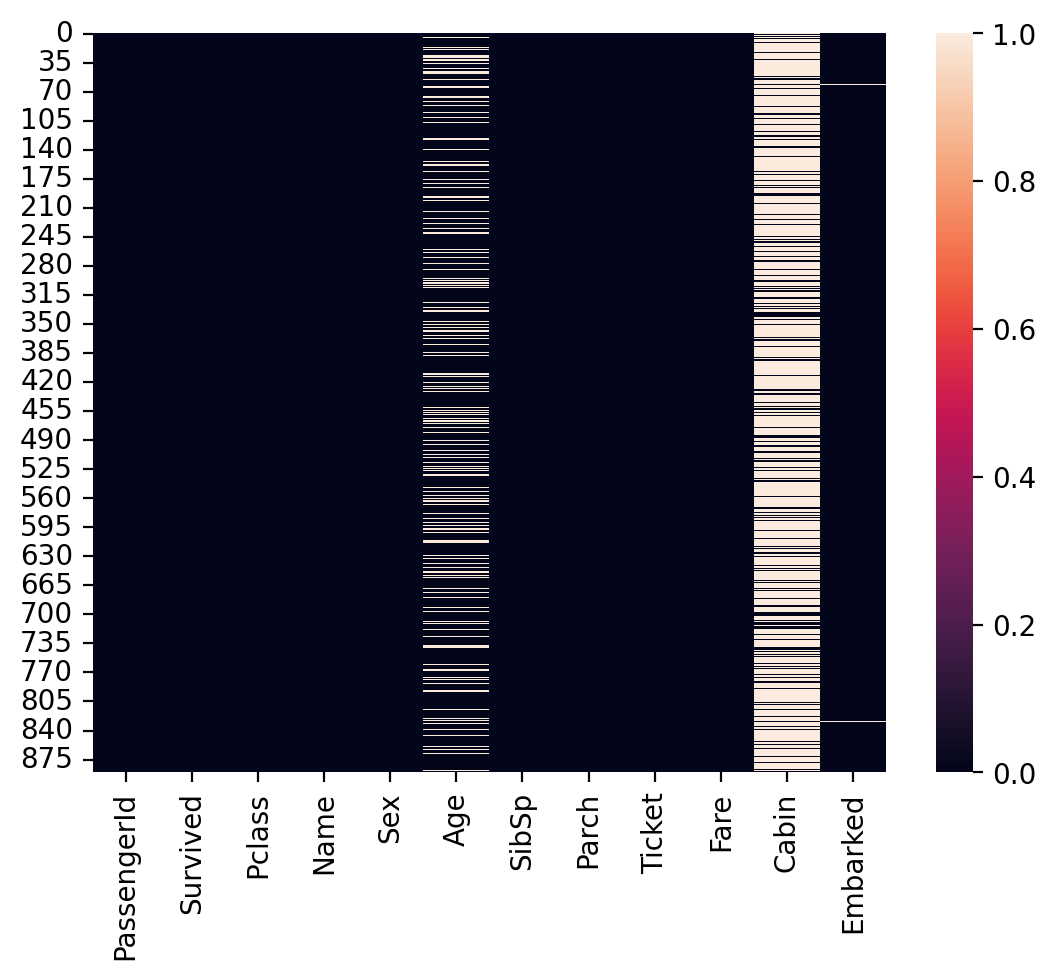

In [5]:
sns.heatmap(df_titanic.isna());

### Krok 2: Analiza rozkładu danych

Po *zidentyfikowaniu* brakujących danych, następnym krokiem jest określenie, w jaki sposób te brakujące dane są *rozłożone*.

#### Czy zmienna $Y$ jest *różna* w zależności od tego, czy $X$ jest `nan`?

Jednym z podejść jest zapytanie, czy jakaś zmienna będąca przedmiotem zainteresowania (np. `Przeżył`) jest *różna* w zależności od tego, czy jakaś *inna* zmienna jest `nan`.

In [13]:
### Średnie przeżycie dla osób bez danych dotyczących informacji o kabinie
df_titanic[df_titanic['Cabin'].isna()]['Survived'].mean()

np.float64(0.29985443959243085)

In [14]:
### Średnie przeżycie dla osób *posiadających* dane dotyczące informacji o kabinie
df_titanic[~df_titanic['Cabin'].isna()]['Survived'].mean()

np.float64(0.6666666666666666)

#### Twoja kolej!

Jaki jest średni wskaźnik `Survived` dla wartości z wartością `nan` dla `Age` w porównaniu do tych z wartościami non-null? Jak wypada to w porównaniu z ogólnym wskaźnikiem `Survived`?

In [ ]:
### Twój kod tutaj
 

0.2937853107344633
0.4061624649859944


#### Pakiet `missingno`

Jeśli chcesz zagłębić się w temat, możesz zapoznać się z biblioteką `missingno` w Pythonie (którą należy zainstalować osobno).

- [Tutorial pakietu `missingno`](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009).
- [Strona domowa pakietu `missingno`](https://github.com/ResidentMario/missingno). 

<iframe width="560" height="315" src="https://www.youtube.com/embed/Wdvwer7h-8w?si=HAHObrrWiYjbgPr5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


### Znalezienie przyczyny braku danych przy użyciu wykresu macierzowego 

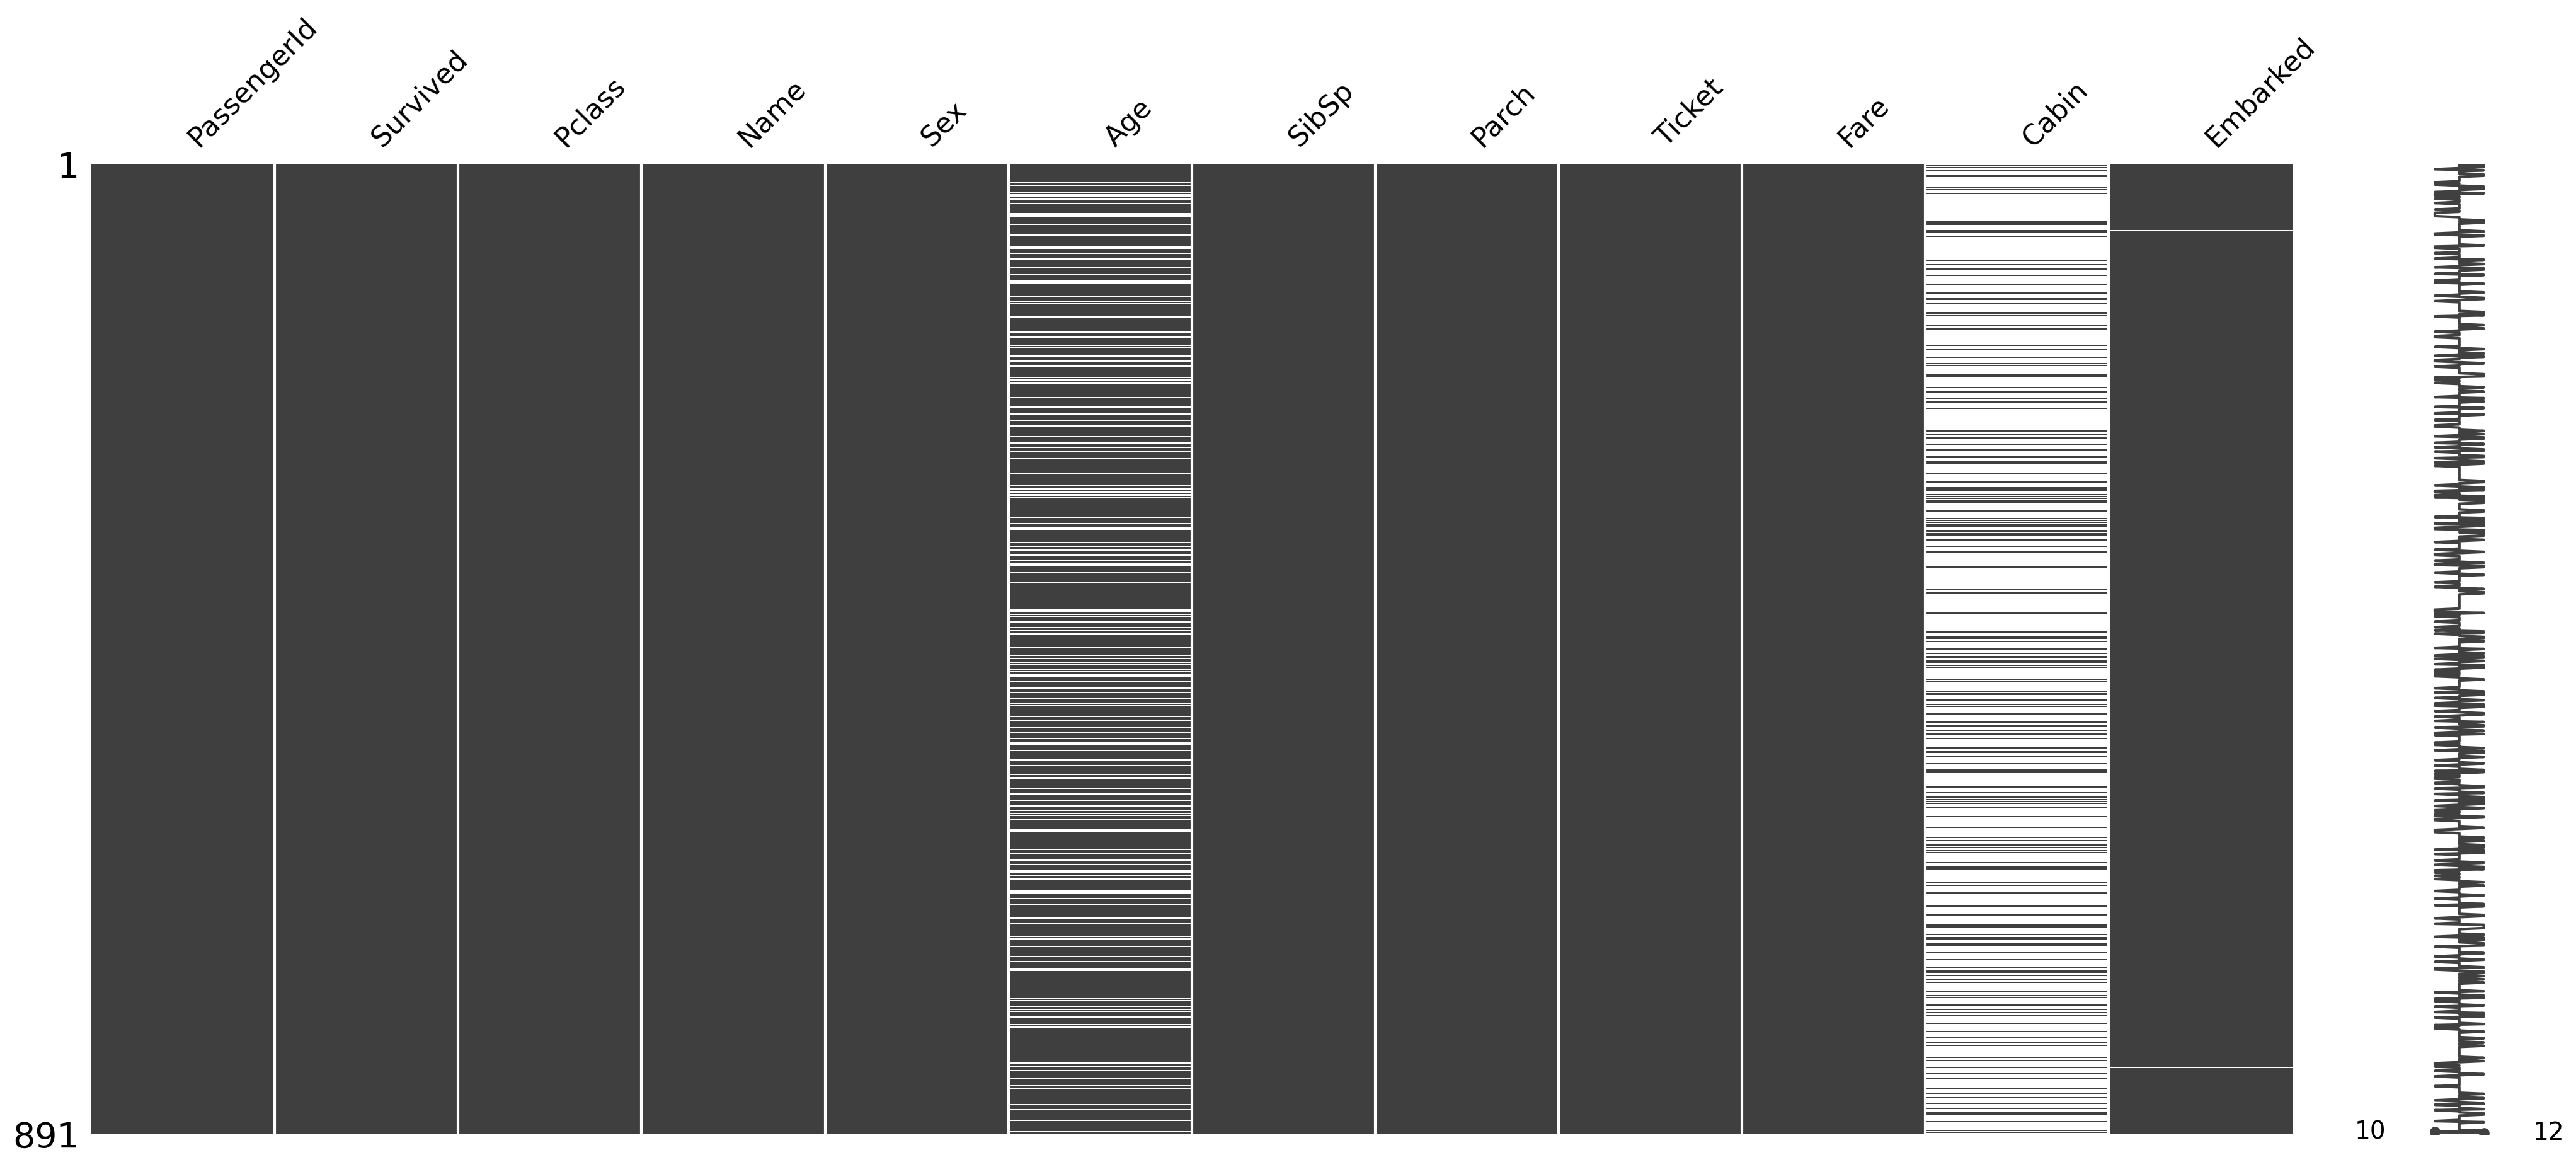

In [6]:
import missingno as msno
msno.matrix(df_titanic);

### Znalezienie przyczyny brakujących danych przy użyciu Heatmapy

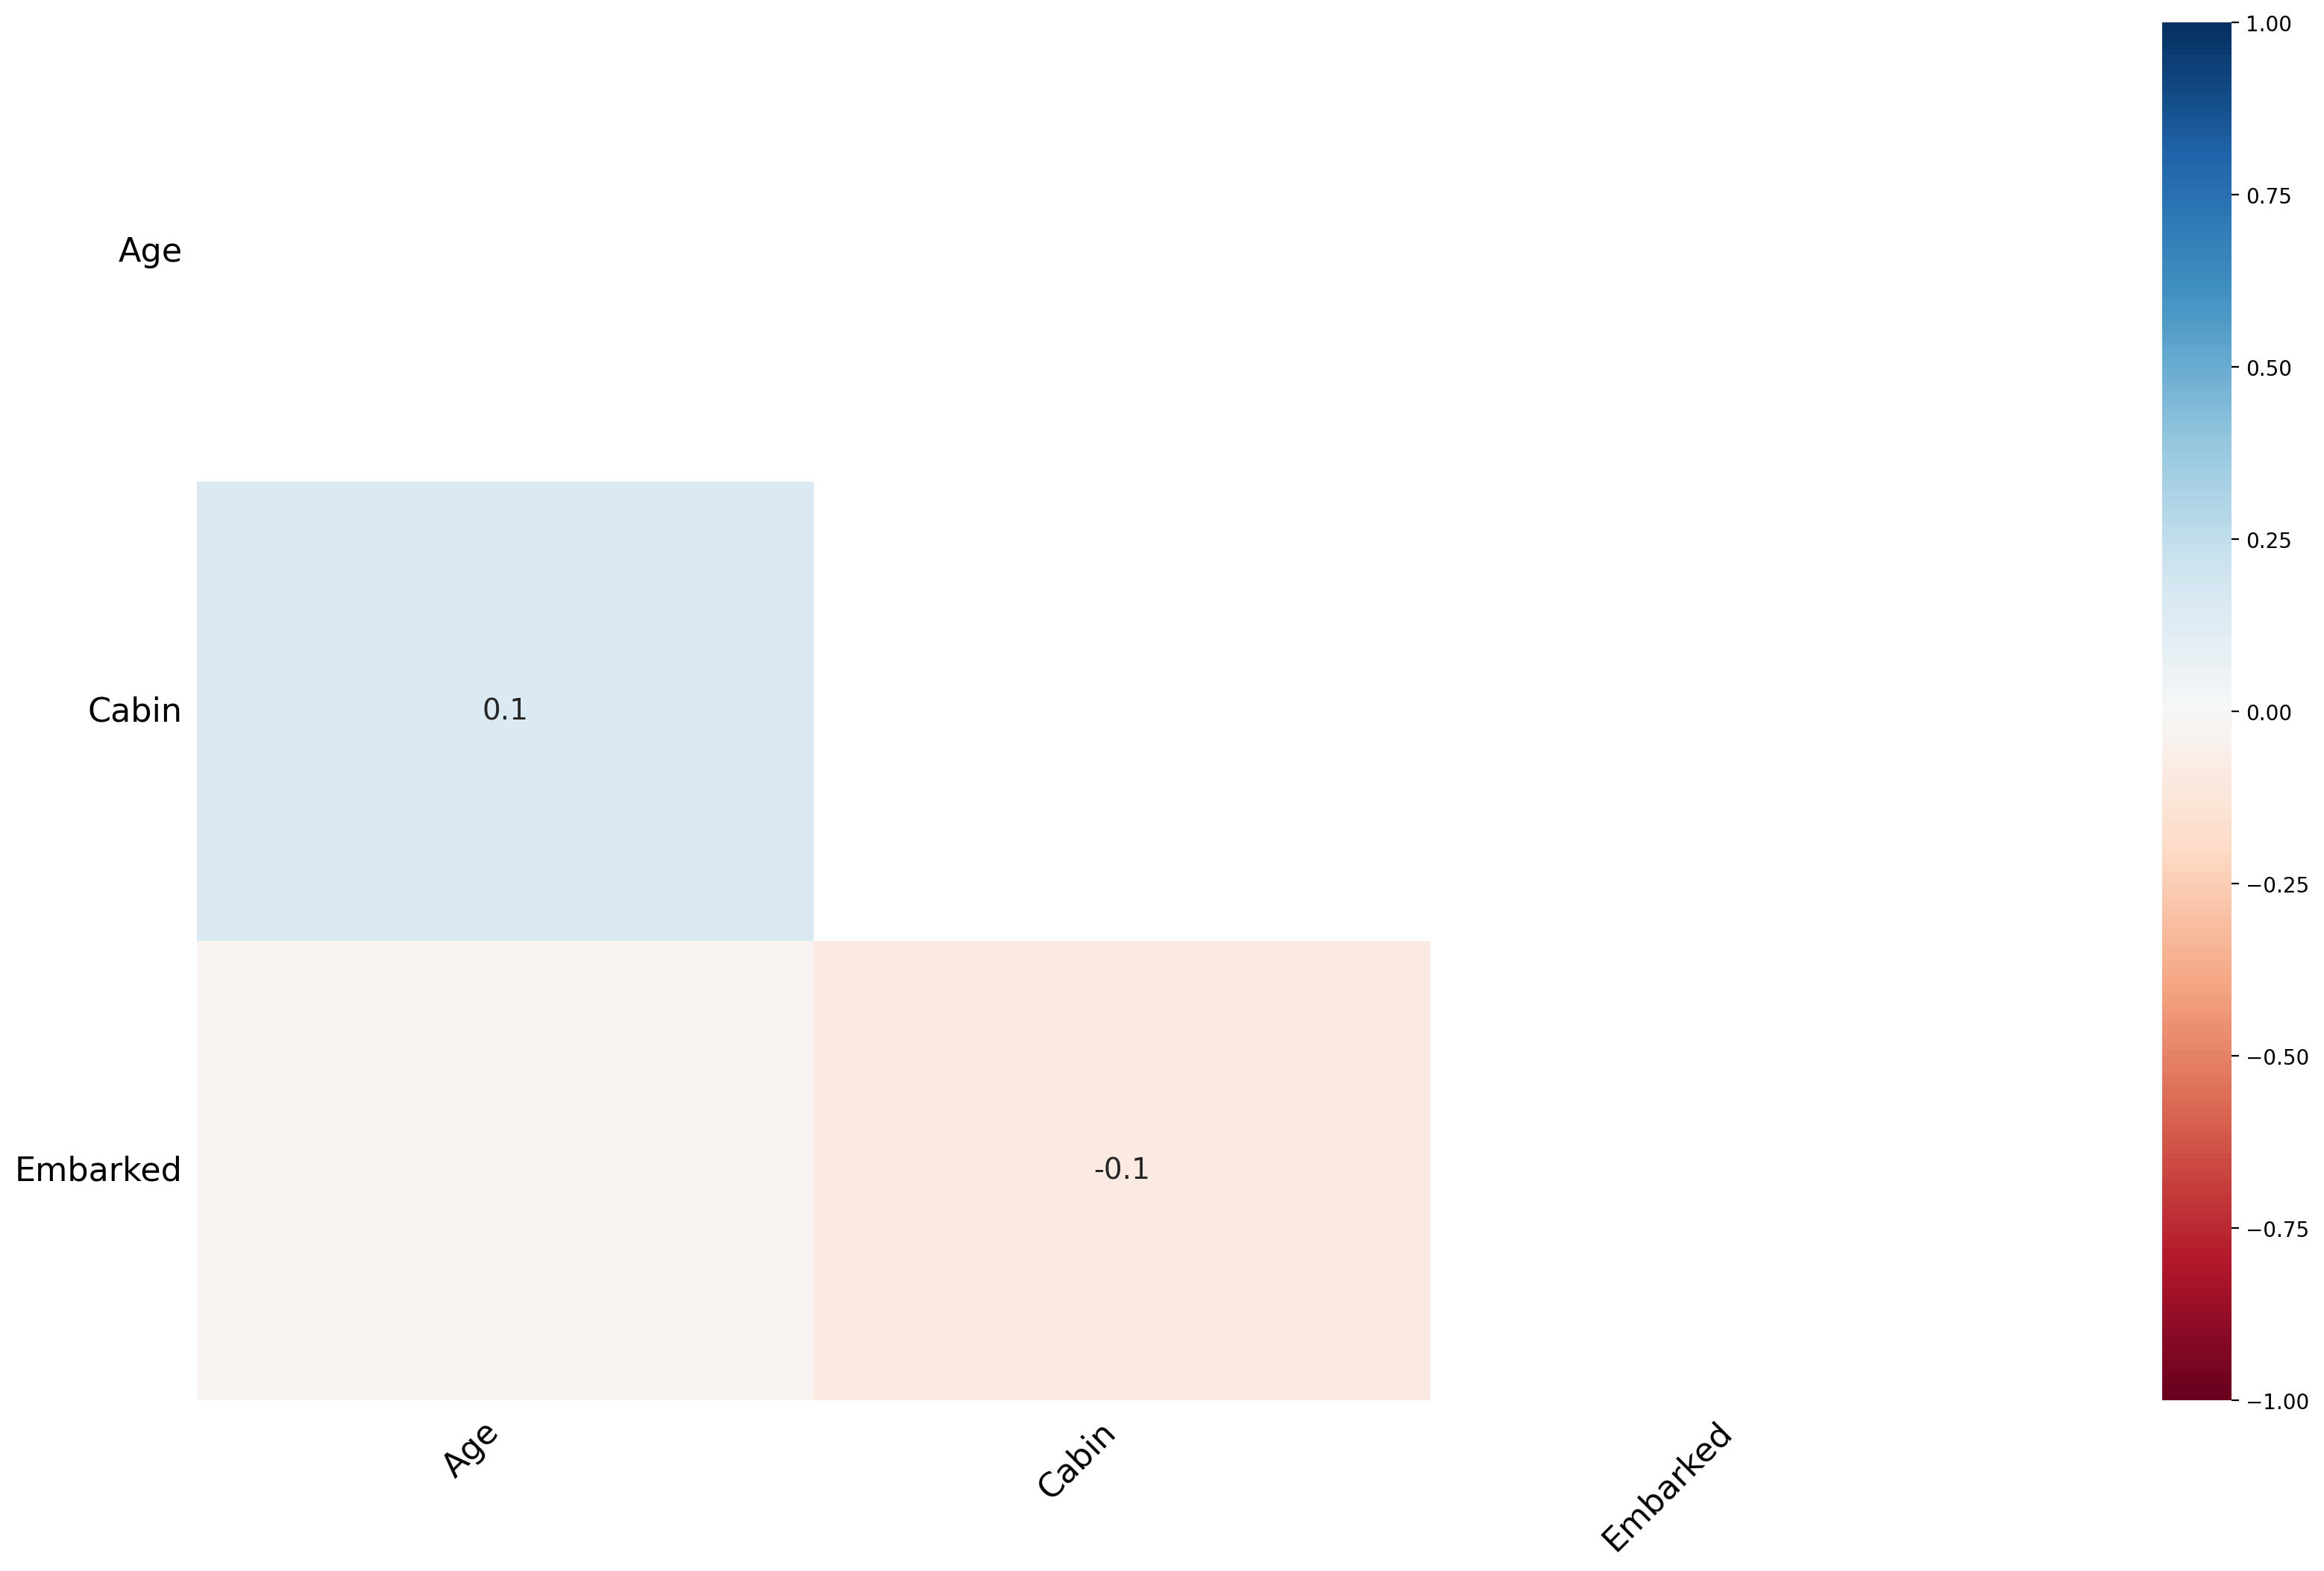

In [22]:
msno.heatmap(df_titanic);

Funkcja mapy cieplnej pokazuje, że nie ma silnych korelacji między brakującymi wartościami różnych cech. To dobrze; niskie korelacje wskazują ponadto, że dane są MAR.

## Znajdowanie przyczyny braku danych przy użyciu dendrogramu 

Dendrogram to diagram drzewa brakujących danych. Grupuje on razem wysoce skorelowane zmienne.

Jak następuje podział na drzewie? 

**Metoda Warda** to jedna z metod hierarchicznego grupowania (ang. hierarchical clustering), używana m.in. w `msno.dendrogram`. Działa ona w następujący sposób:

1. **Na początku** każda kolumna (lub obserwacja) traktowana jest jako osobna grupa.
2. **Na każdym kroku** łączone są te dwie grupy, których połączenie powoduje najmniejszy wzrost tzw. sumy kwadratów odchyleń wewnątrzgrupowych (ang. within-cluster sum of squares).
3. **Celem** jest minimalizacja wzrostu "błędu" po połączeniu – czyli łączone są te grupy, które są do siebie najbardziej podobne pod względem rozkładu braków.
4. Proces powtarza się aż do połączenia wszystkich grup w jedno drzewo (dendrogram).

**W praktyce:** Metoda Warda tworzy najbardziej "kompaktowe" i jednorodne grupy, minimalizując różnice wewnątrz każdej grupy na każdym etapie łączenia.

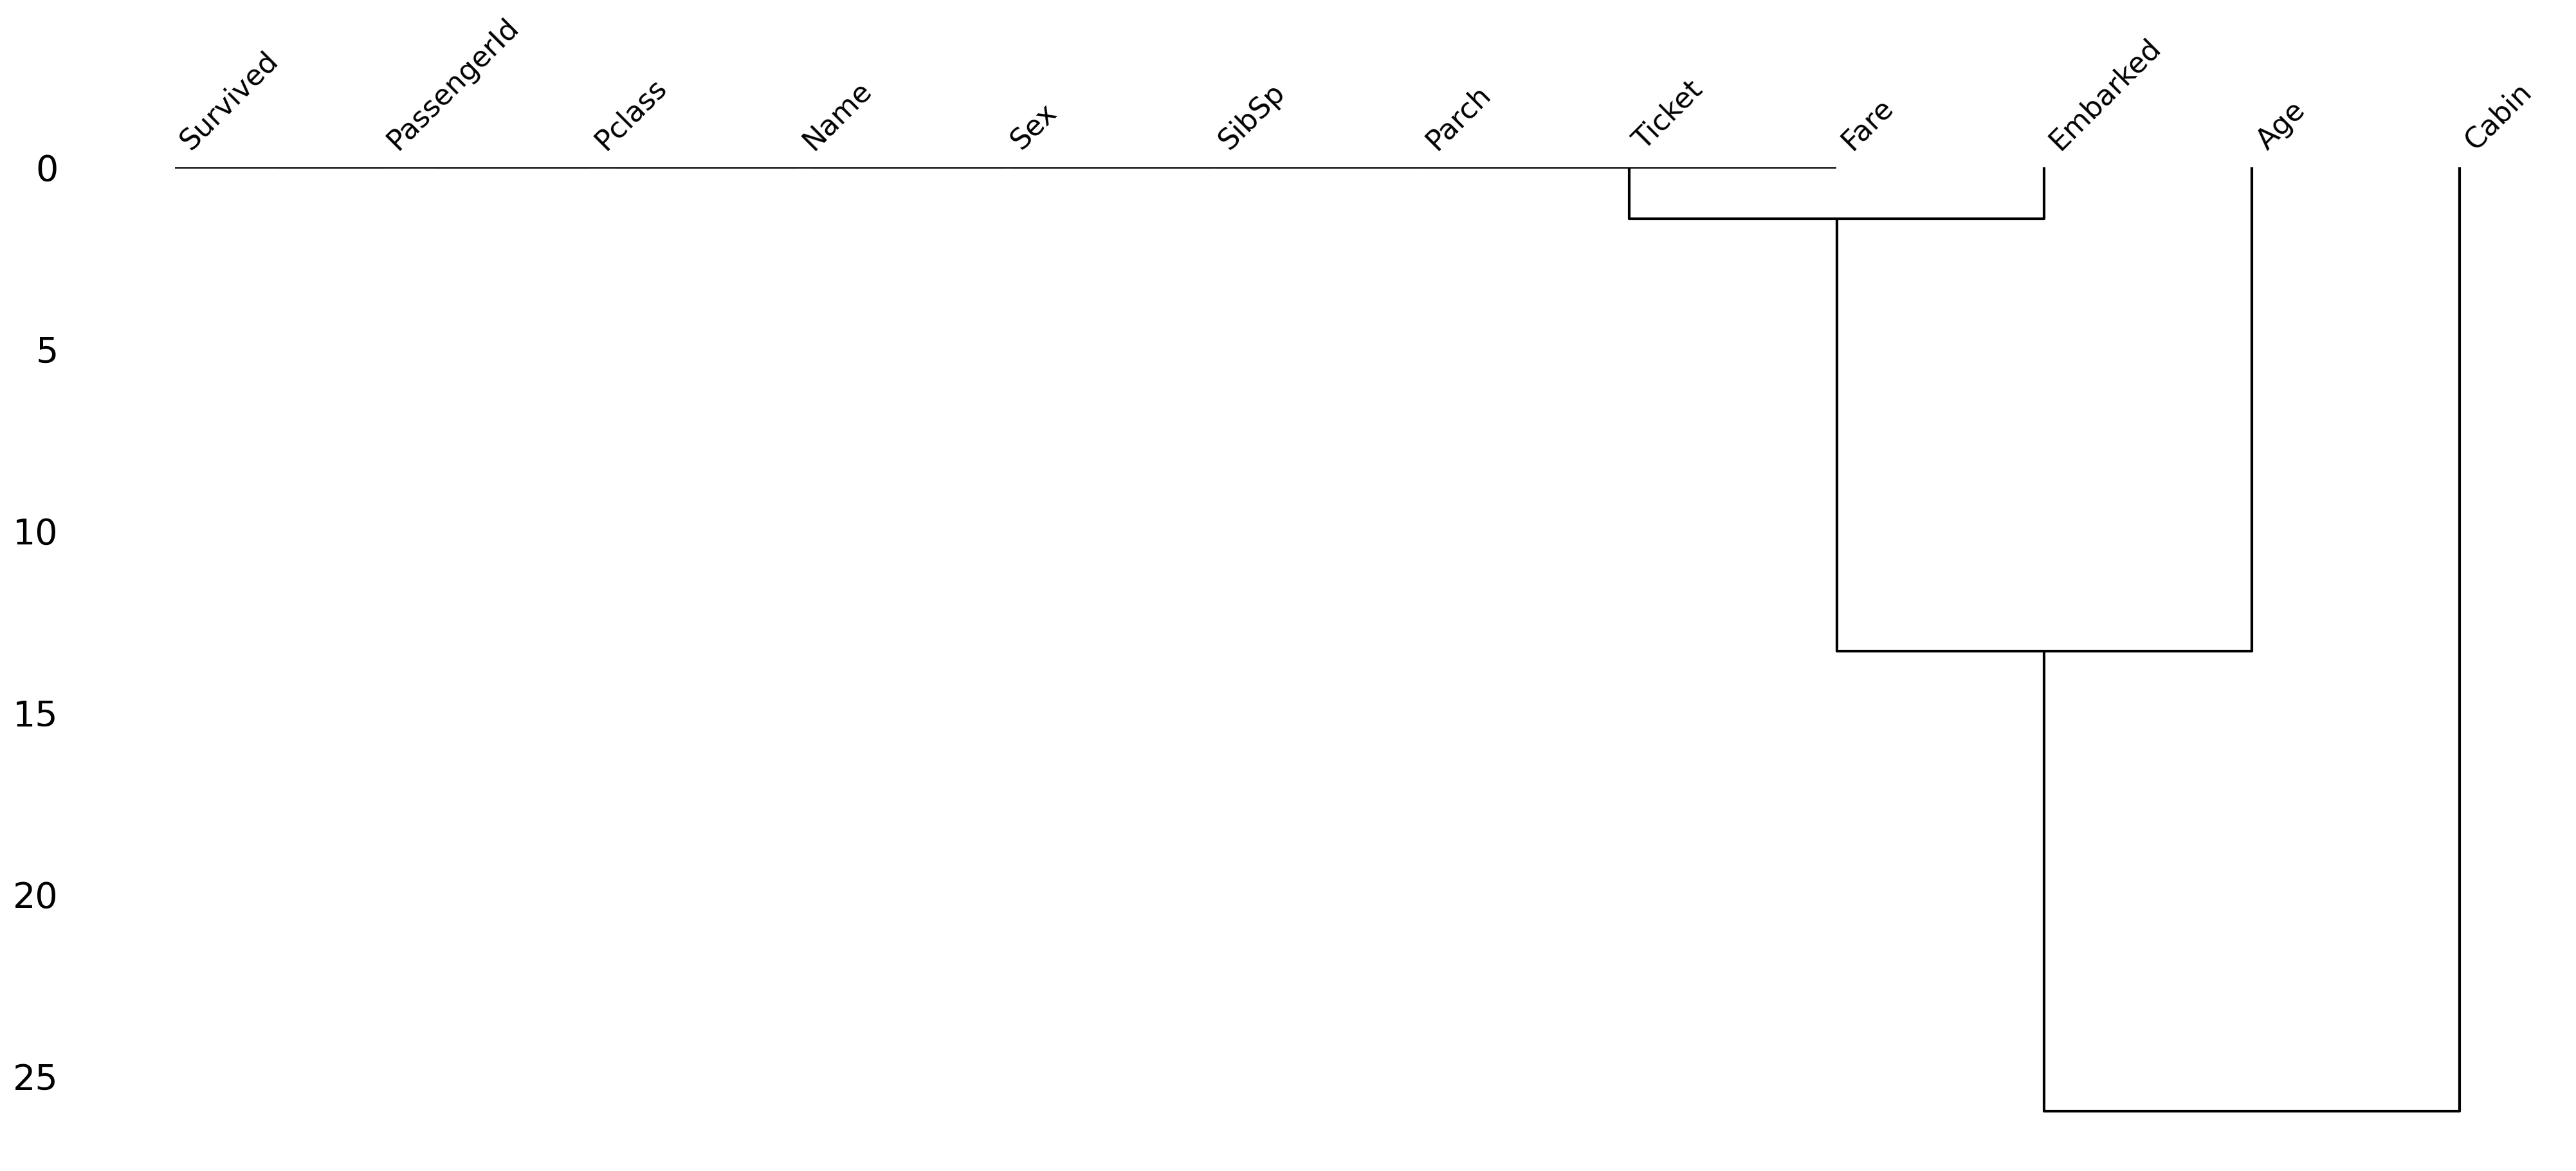

In [7]:
msno.dendrogram(df_titanic);

**Jak czytać dendrogram?**

Przeczytajmy powyższy dendrogram z góry na dół:

<span style="color:red">Im niższy poziom połączenia (bliżej zera na osi Y), tym silniejsza zależność – np. kolumny zawsze mają braki w tych samych wierszach.</span> Wysokość połączenia (na osi Y) pokazuje, jak bardzo różnią się wzorce braków między grupami kolumn – im wyżej, tym mniej podobne. Bliskie połączenie (nisko) oznacza, że braki w tych kolumnach są silnie skorelowane.
Oddalone połączenie (wysoko) oznacza, że braki występują niezależnie.

<span style="color:red">Liście klastra, które łączą się ze sobą w odległości równej zero, w pełni przewidują wzajemną obecność - jedna zmienna może być zawsze pusta, gdy inna jest wypełniona, lub obie mogą być zawsze wypełnione lub obie puste i tak dalej.<span style="color:red">

**Jednak w tym konkretnym przypadku korelacja jest wysoka, ponieważ kolumna Embarked ma bardzo niewiele brakujących wartości.** Ten zbiór danych nie ma zbyt wielu brakujących wartości, ale jeśli zastosujesz tę samą metodologię do zbiorów danych zawierających wiele brakujących wartości, z pewnością pojawi się jakiś interesujący wzorzec.

Podsumowując:
- Jeśli dwie kolumny łączą się bardzo nisko, to prawie zawsze mają braki w tych samych wierszach.
- Jeśli kolumna łączy się z innymi dopiero wysoko, jej braki są raczej niezależne.

Dendrogram pomaga znaleźć grupy zmiennych, które mają podobny rozkład braków – to ważne np. przy imputacji lub analizie przyczyn braków.

### Krok 3: Ustal, co należy zrobić!

Po *zidentyfikowaniu* brakujących danych należy określić, w jaki sposób je *obsłużyć*.

Istnieje kilka możliwych podejść.

- **Usunięcie** wszystkich wierszy z *wszystkimi* brakującymi danymi. 
- **Usuwanie** wierszy z brakującymi danymi tylko wtedy, gdy zmienna ta jest istotna dla analizy lub wizualizacji.
- **Imputowanie** (tj. zgadywanie), jakie wartości powinny mieć brakujące dane.

#### Usuwanie wszystkich wierszy z brakującymi danymi

- Możemy *filtrować* naszą `DataFrame` używając `dropna`, która automatycznie „usunie” wszystkie wiersze zawierające wartości null.  
- Uwaga: jeśli masz wiele brakujących danych, może to znacząco wpłynąć na rozmiar twojego zbioru danych.

In [8]:
df_filtered = df_titanic.dropna()
df_filtered.shape

(183, 12)

#### Usuwanie wszystkich wierszy z brakującymi danymi w określonych kolumnach

- Tutaj określamy, że chcemy tylko `dropna` dla wierszy, które mają `nan` w kolumnie `Age`.  
- Nadal mamy brakujące `nan` dla `Cabin`, ale być może w naszym przypadku jest to w porządku.

In [9]:
df_filtered = df_titanic.dropna(subset = "Age")
df_filtered.shape

(714, 12)

#### Imputowanie brakujących danych

Jednym z najbardziej złożonych (i kontrowersyjnych) podejść jest *imputowanie* wartości brakujących danych. 

Istnieje (ponownie) wiele sposobów, aby to zrobić:

1. Ustalenie **stałej** wartości i przypisanie jej do wszystkich wartości `nan`.
   - Na przykład, przypisz `średni` `wiek` wszystkim osobom z `nan` w tej kolumnie.
2. Spróbuj **odgadnąć** wartość na podstawie określonych cech danych.
   - Np. na podstawie innych cech tej osoby, jaki jest jej prawdopodobny `wiek`?
  

##### Imputowanie stałej wartości

Możemy użyć `fillna`, aby przypisać wszystkim wartościom z `nan` dla `Age` jakąś inną wartość.

In [10]:
## Przypisz średni wiek do wszystkich osób z nan dla wieku
df_titanic['Age_imputed1'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
## Przyjrzyjmy się teraz tym wierszom
df_titanic[df_titanic['Age'].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,29.699118
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,29.699118
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,29.699118
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,29.699118


##### Zgadywanie na podstawie innych cech

- Możesz spróbować *zgadnąć* jaki byłby ich `Age`, bazując na innych cechach.
- Bardziej wyrafinowaną wersją tego jest użycie **modelowania statystycznego** lub użycie `SimpleImputer` z biblioteki `sklearn`.  
- Na razie wystarczy zauważyć, że `Age` koreluje z innymi cechami (takimi jak `Pclass`).

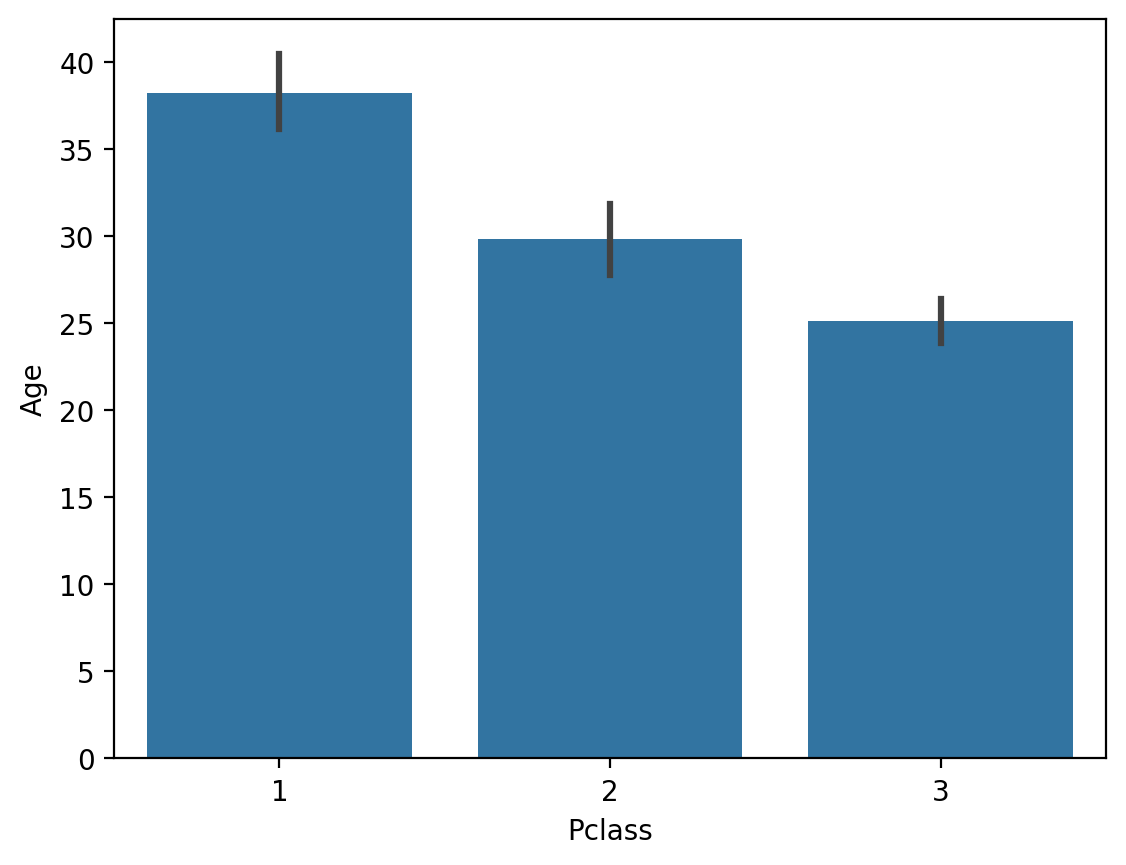

In [11]:
## Klasa pasażerów jest skorelowana z wiekiem
sns.barplot(data = df_titanic, x = 'Pclass', y = 'Age');

#### Twoja kolej!

Co by się stało, gdybyśmy użyli `fillna` z `median` `Age` zamiast `mean`? Dlaczego miałoby to znaczenie?

In [12]:
### Twój kod tutaj

## Imputacja losowa / hot deck

Imputacja Hot Deck to metoda, w której każda brakująca wartość jest zastępowana wartością z podobnego rekordu w zbiorze danych, często określanego jako „dawca”. Rekord dawcy jest wybierany na podstawie kryteriów dopasowania - takich jak cechy demograficzne lub bliskość w wielowymiarowej przestrzeni cech - w celu zapewnienia, że imputacja zachowuje nieodłączny rozkład i relacje w danych.

Na przykład, jeśli brakuje danych o dochodach respondenta ankiety, wartość dochodu podobnego respondenta (oparta na czynnikach takich jak zawód, lokalizacja geograficzna i poziom wykształcenia) jest używana jako substytut.

Imputacja Hot Deck ma kluczowe znaczenie dla zachowania integralności zbioru danych. Zapewnia ona, że:

- Analizy statystyczne nie są stronnicze z powodu arbitralnego lub odrzucenia niekompletnych przypadków.
- Naturalna zmienność i wzorce dystrybucji obecne w kompletnych przypadkach są zachowane.
- Porównania między różnymi grupami w ramach danych pozostają wykonalne i ważne.


**Imputacja losowa Hot Deck**: W tej metodzie brakujące wartości są imputowane poprzez losowy wybór dawcy z puli potencjalnych kandydatów. Pozwala to zachować rozkład danych, zwłaszcza gdy braki są losowe. Wadą jest jednak to, że losowość może przeoczyć niuanse w danych.

**Imputacja Hot Deck najbliższego sąsiedztwa**: W tym przypadku dawca jest wybierany na podstawie podobieństwa obserwowanych cech. Powszechnie stosowanym algorytmem jest podejście k-najbliższych sąsiadów (k-NN), które oblicza metrykę odległości między obserwacjami. Dla rekordu z brakującą wartością określa się jego k najbliższych sąsiadów (pod względem odległości euklidesowej lub Mahalanobisa), a jedna z ich wartości jest używana do imputacji.

Algorytm k-NN identyfikuje najbliższe rekordy, które minimalizują odległość:

$d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$

gdzie:
- $(x)$ i $(y)$ to dwa punkty w przestrzeni n-wymiarowej,
- $(x_i)$ i $(y_i)$ to współrzędne punktów $(x)$ i $(y)$ w wymiarze $(i)$,
- $d(x, y)$ to [odległość euklidesowa](https://pl.wikipedia.org/wiki/Odległość) między punktami $(x)$ i $(y)$.


Imputacja Hot Deck oferuje kilka korzyści w porównaniu z innymi metodami:

1. **Imputacja średniej/mediany**: W przeciwieństwie do zwykłego zastępowania brakujących wartości ogólną średnią lub medianą, imputacja Hot Deck wykorzystuje informacje z podobnych przypadków. Pozwala to zachować lokalną zmienność i uwzględnia relacje między zmiennymi.

2. **Imputacja regresyjna**: Podczas gdy imputacja regresji opiera się na modelach predykcyjnych w celu oszacowania brakujących wartości, może ona prowadzić do stronniczych szacunków, jeśli założenia modelu zostaną naruszone. Natomiast imputacja Hot Deck bezpośrednio zapożycza obserwowane wartości, często czyniąc ją bardziej odporną w różnych warunkach.

3. **Imputacja wielokrotna**: Imputacja wielokrotna tworzy kilka imputowanych zestawów danych i łączy wyniki do ostatecznej analizy, uwzględniając niepewność imputacji. Chociaż często jest bardziej wyrafinowana statystycznie, może być kosztowna obliczeniowo. Imputacja Hot Deck pozostaje praktycznym wyborem, gdy priorytetem jest zachowanie łatwości interpretacji i wydajności obliczeniowej.

Głównym wnioskiem jest to, że **imputacja Hot Deck oferuje intuicyjne, praktycznie wykonalne podejście, które nadal respektuje statystyczne właściwości danych**.

### Imputacja losowa Hot-deck

In [12]:
# Przykład imputacji losowej Hot Deck
def random_hot_deck_imputation(df, column):
    # Filtrujemy wartości nie-null
    non_null_values = df[column].dropna().values
    # Zastępujemy NaN losową wartością z istniejących
    df[column] = df[column].apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)
    return df

# Imputacja dla kolumny 'Age'
df_titanic = random_hot_deck_imputation(df_titanic, 'Age')
df_titanic.isna().any()

PassengerId     False
Survived        False
Pclass          False
Name            False
Sex             False
Age             False
SibSp           False
Parch           False
Ticket          False
Fare            False
Cabin            True
Embarked         True
Age_imputed1    False
dtype: bool

### Wybór optymalnej liczby sąsiadów w metodzie k-NN

Zamiast zgadywać i arbitralnie wybierać liczbę sąsiadów w metodzie imputacji k-NN - lepiej jest zastosować <span style="color:red">**metodę łokcia (elbow method)**</span> do wyboru optymalnej liczby sąsiadów w imputacji k-NN (KNNImputer).

Metoda polega na:

- Sztucznym usunięciu części znanych wartości w danych (np. losowo zamieniasz część wartości na NaN).
- Imputacji braków dla różnych wartości n_neighbors (np. od 2 do 15).
- Obliczeniu błędu (np. MSE) między wartościami imputowanymi a prawdziwymi.
- Wizualizacji błędu w funkcji liczby sąsiadów – szukasz „łokcia”, czyli punktu, po którym dalsze zwiększanie liczby sąsiadów nie poprawia już znacząco wyniku.
  
Przykład kodu (nie jest to jeszcze prawdziwa imputacja istniejących braków, lecz sztuczne ich wytworzenie, aby zasymulować dobór optymalnej liczby k - sąsiadów):

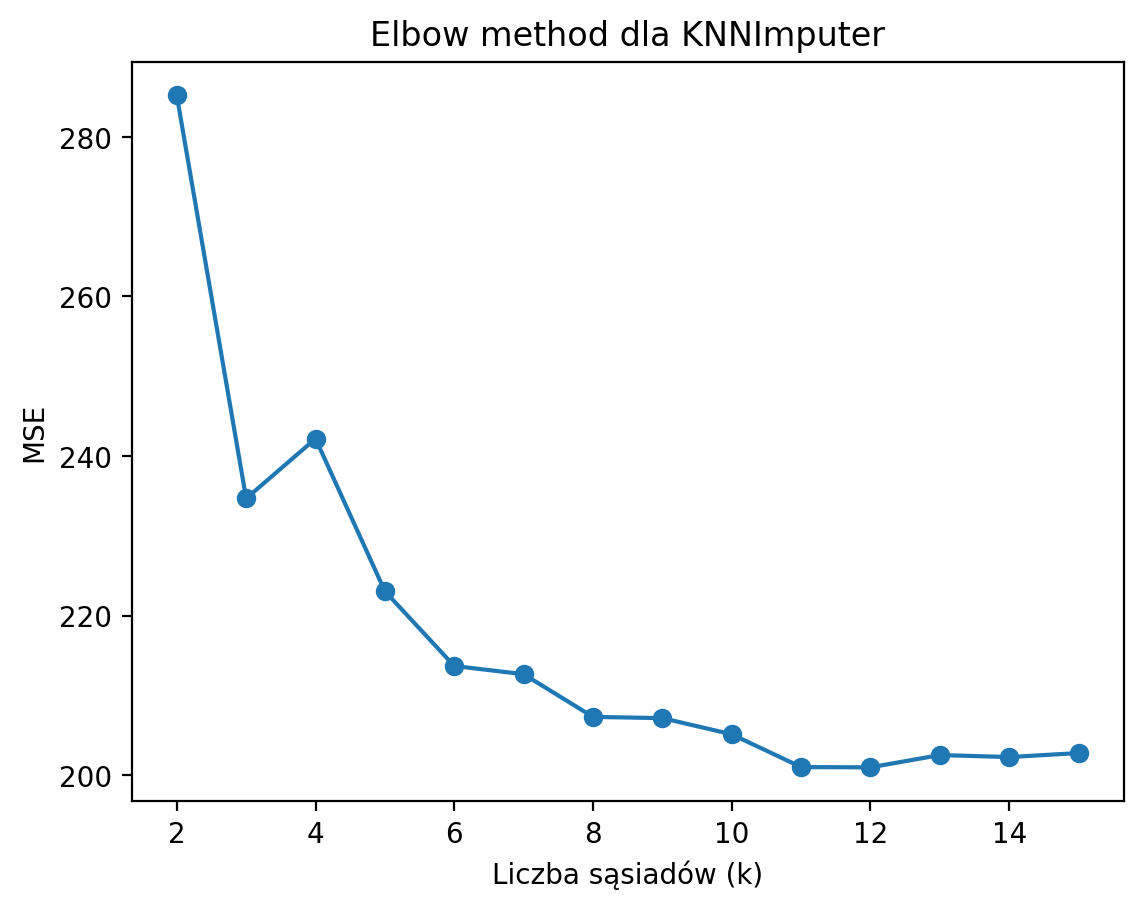

In [16]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Załóżmy, że masz df z kolumną 'Age' bez braków
df = df_titanic[['Age', 'Fare']].dropna().copy()
np.random.seed(42)
mask = np.random.rand(len(df)) < 0.2  # 20% losowych braków
df_missing = df.copy()
df_missing.loc[mask, 'Age'] = np.nan

errors = []
neighbors = range(2, 16)
for k in neighbors:
    imputer = KNNImputer(n_neighbors=k)
    imputed = imputer.fit_transform(df_missing)
    mse = mean_squared_error(df['Age'][mask], imputed[mask, 0])
    errors.append(mse)

plt.plot(neighbors, errors, marker='o')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('MSE')
plt.title('Elbow method dla KNNImputer')
plt.show()

Wybieramy taką liczbę sąsiadów, gdzie błąd przestaje wyraźnie spadać – to jest „łokieć”.

<span style="color:red">W tym przypadku, jak widzimy na powyzszym wykresie - optymalnie byłoby wybrać 3 sąsiadów.</span>

To podejście jest analogiczne do wyboru liczby klastrów w k-means.

---

Ok, a teraz zajmijmy się "prawdziwymi" problemami z brakami danych wybierając 3 sąsiadów w metodzie hotdeck:

### Imputacja Hot Deck najbliższego sąsiedztwa (k-NN)

In [15]:
from sklearn.impute import KNNImputer

# Tworzymy obiekt KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)  # tutaj wstawiasz optymalną liczbę sąsiadów

# Wybieramy kolumny numeryczne do imputacji
columns_to_impute = ['Age', 'Fare']  # Przykład kolumn
df_titanic[columns_to_impute] = knn_imputer.fit_transform(df_titanic[columns_to_impute])

df_titanic.isna().any()

PassengerId     False
Survived        False
Pclass          False
Name            False
Sex             False
Age             False
SibSp           False
Parch           False
Ticket          False
Fare            False
Cabin            True
Embarked         True
Age_imputed1    False
dtype: bool

### Podsumowanie 

1. Imputacja losowa Hot Deck:

- Wartości NaN w kolumnie są zastępowane losową wartością z istniejących danych w tej samej kolumnie.
- Jest to szybkie, ale może wprowadzać losowość, która nie uwzględnia zależności między zmiennymi.

2. Imputacja Hot Deck najbliższego sąsiedztwa (k-NN):

- Algorytm k-NN wykorzystuje inne cechy (np. Pclass, Fare), aby znaleźć podobne rekordy i imputować brakujące wartości.
- Jest bardziej zaawansowany i uwzględnia relacje między zmiennymi.

## Imputacja jednowymiarowa vs. Imputacja wielowymiarowa 

Imputacja jednowymiarowa: która imputuje wartości w i-tym wymiarze funkcji, wykorzystując tylko wartości, których nie brakuje w tym wymiarze funkcji (np. impute.SimpleImputer).

Algorytmy imputacji wielowymiarowej wykorzystują cały zestaw dostępnych wymiarów cech do oszacowania brakujących wartości (np. impute.IterativeImputer).

In [17]:
import sklearn
from sklearn.impute import SimpleImputer 

## SimpleImputer

Ta klasa zapewnia podstawowe strategie przypisywania brakujących wartości. Brakujące wartości można przypisać za pomocą dostarczonej wartości stałej lub przy użyciu statystyk (średnia, mediana lub najczęstsze) każdej kolumny, w której znajdują się brakujące wartości.

In [19]:
df_sales = pd.read_excel("data/Saless.xlsx")
df_sales.head(5)

,Date,Store_Type,City_Type,Day_Temp,No_of_Customers,Sales,Product_Quality
0,2020-10-01,1,1,30.0,100.0,3112.0,A
1,2020-10-02,2,1,32.0,115.0,3682.0,A
2,2020-10-03,3,3,31.0,NaN,2774.0,A
3,2020-10-04,1,2,29.0,105.0,3182.0,NaN
4,2020-10-05,1,2,33.0,104.0,1368.0,B


Zastąpimy brakujące wartości (NaN) w kolumnie "Day_Temp" średnią wartością tej kolumny:

In [38]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(df_sales.iloc[:,3:4]) #oznacza wybór wszystkich wierszy, wybór kolumn o indeksach od 3 do 4 (bez 4), czyli tylko kolumny o indeksie 3.
df_sales.iloc[:,3:4]=imputer.transform(df_sales.iloc[:,3:4])

Zamiast osobno wywoływać fit() i transform(), użyjemy teraz metody fit_transform(), która jednocześnie dopasowuje imputera do danych (oblicza średnią) i przekształca brakujące wartości (NaN) w jednej operacji.

Efekt końcowy jest taki sam: brakujące wartości w czwartej kolumnie (df_saless.iloc[:, 3:4]) zostają zastąpione średnią tej kolumny.

In [39]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

df_sales.iloc[:,3:4]=imputer.fit_transform(df_sales.iloc[:,3:4])

Zastąpić mozemy brakujące wartości (NaN) w dwóch kolumnach (Day_Temp i No_of_Customers, zakładając, że są to kolumny o indeksach 3 i 4) średnimi wartościami odpowiednich kolumn.

In [40]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(df_sales.iloc[:,3:5])
df_sales.iloc[:,3:5]=imputer.transform(df_sales.iloc[:,3:5])

Klasa SimpleImputer obsługuje również dane kategoryczne reprezentowane jako wartości łańcuchowe lub kategorie pandas przy użyciu strategii „most_frequent” lub „constant”:

In [42]:
df = pd.DataFrame([["a", "x"],
                    [np.nan, "y"],
                    ["a", np.nan],
                    ["b", "y"]], dtype="category")
df

,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


In [43]:
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


In [44]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

Zastępujemy teraz brakujące wartości (NaN) w ostatniej kolumnie df_sales najczęściej występującą wartością w tej kolumnie.

imp_cat to obiekt SimpleImputer z ustawioną strategią "most_frequent", co oznacza, że brakujące wartości zostaną zastąpione najczęściej; df_saless.iloc[:, -1:] wybiera ostatnią kolumnę w DataFrame jako DataFrame (zachowując dwuwymiarową strukturę).

In [46]:
#imp_cat.fit_transform(df_saless.iloc[:,-1:])
df_sales.iloc[:,-1:] = imp_cat.fit_transform(df_sales.iloc[:,-1:])

In [47]:
df_sales

,Date,Store_Type,City_Type,Day_Temp,No_of_Customers,Sales,Product_Quality
0,2020-10-01,1,1,30.000000,100.000000,3112.0,A
1,2020-10-02,2,1,32.000000,115.000000,3682.0,A
2,2020-10-03,3,3,31.000000,99.444444,2774.0,A
3,2020-10-04,1,2,29.000000,105.000000,3182.0,A
4,2020-10-05,1,2,33.000000,104.000000,1368.0,B
5,2020-10-07,2,2,28.111111,99.444444,NaN,B
6,2020-11-24,2,3,26.000000,90.000000,4232.0,C
7,2020-11-25,3,3,28.111111,96.000000,NaN,A
8,2020-11-26,2,2,27.000000,100.000000,2356.0,B
9,2020-11-28,3,1,28.111111,99.444444,NaN,A


Jeśli chcemy zastąpić określoną wartość wartością NaN, używamy strategii z fill_value:

In [51]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value='G')

df_sales.iloc[:,-1:] = imp_cat.fit_transform(df_sales.iloc[:,-1:])

df_sales

,Date,Store_Type,City_Type,Day_Temp,No_of_Customers,Sales,Product_Quality
0,2020-10-01,1,1,30.000000,100.000000,3112.0,A
1,2020-10-02,2,1,32.000000,115.000000,3682.0,A
2,2020-10-03,3,3,31.000000,99.444444,2774.0,A
3,2020-10-04,1,2,29.000000,105.000000,3182.0,A
4,2020-10-05,1,2,33.000000,104.000000,1368.0,B
5,2020-10-07,2,2,28.111111,99.444444,NaN,B
6,2020-11-24,2,3,26.000000,90.000000,4232.0,C
7,2020-11-25,3,3,28.111111,96.000000,NaN,A
8,2020-11-26,2,2,27.000000,100.000000,2356.0,B
9,2020-11-28,3,1,28.111111,99.444444,NaN,A


## IterativeImputer

A teraz omówimy kilka przykładów użycia klasy IterativeImputer z biblioteki sklearn.impute, która umożliwia imputację brakujących wartości w danych przy użyciu iteracyjnych modeli regresji.

Możesz użyć innych modeli jako estymatorów w IterativeImputer, takich jak:
- LinearRegression (klasyczna regresja liniowa).
- DecisionTreeRegressor (drzewa decyzyjne).
- RandomForestRegressor (las losowy).
- KNeighborsRegressor (regresja k-najbliższych sąsiadów).


**IterativeImputer** działa w ten sposób, że iteracyjnie przewiduje brakujące wartości w jednej kolumnie na podstawie pozostałych kolumn, używając modelu regresji.

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

data = {
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, 7, 8],
    'C': [np.nan, 11, 12, 13]
}
df = pd.DataFrame(data)

# Tworzymy obiekt IterativeImputer z modelem LinearRegression
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=42)

# Dopasowujemy i transformujemy dane
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Oryginalne dane:")
print(df)
print("\nDane po imputacji:")
print(df_imputed)

Oryginalne dane:
     A    B     C
0  1.0  5.0   NaN
1  2.0  NaN  11.0
2  NaN  7.0  12.0
3  4.0  8.0  13.0

Dane po imputacji:
          A         B     C
0  1.000000  5.000000  12.0
1  2.000000  6.666667  11.0
2  2.714286  7.000000  12.0
3  4.000000  8.000000  13.0


Różnica między IterativeImputer(max_iter=10, random_state=0) a IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0) polega na domyślnym estymatorze używanym do imputacji brakujących wartości: `IterativeImputer(max_iter=10, random_state=0)` domyślnie używa modelu BayesianRidge jako estymatora do przewidywania brakujących wartości:

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = {
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, 7, 8],
    'C': [np.nan, 11, 12, 13]
}
df = pd.DataFrame(data)

# Tworzymy obiekt IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Dopasowujemy i transformujemy dane
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Oryginalne dane:")
print(df)
print("\nDane po imputacji:")
print(df_imputed)

Oryginalne dane:
     A    B     C
0  1.0  5.0   NaN
1  2.0  NaN  11.0
2  NaN  7.0  12.0
3  4.0  8.0  13.0

Dane po imputacji:
          A         B          C
0  1.000000  5.000000  11.999923
1  2.000000  6.666646  11.000000
2  2.714292  7.000000  12.000000
3  4.000000  8.000000  13.000000


Ponizszy kod tworzy obiekt IterativeImputer z wykorzystaniem modelu regresji **BayesianRidge** jako estymatora do imputacji brakujących wartości w danych. 

W przeciwieństwie do klasycznej regresji liniowej, BayesianRidge traktuje współczynniki regresji jako zmienne losowe z rozkładem prawdopodobieństwa.
Model zakłada priorytetowy rozkład normalny dla współczynników i aktualizuje go na podstawie danych, aby uzyskać rozkład posteriori.

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

data = {
    'X1': [1, 2, np.nan, 4],
    'X2': [np.nan, 3, 6, 8],
    'X3': [7, 8, 9, np.nan]
}
df = pd.DataFrame(data)

# Tworzymy obiekt IterativeImputer z modelem BayesianRidge
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Oryginalne dane:")
print(df)
print("\nDane po imputacji:")
print(df_imputed)

Oryginalne dane:
    X1   X2   X3
0  1.0  NaN  7.0
1  2.0  3.0  8.0
2  NaN  6.0  9.0
3  4.0  8.0  NaN

Dane po imputacji:
         X1        X2        X3
0  1.000000  0.746042  7.000000
1  2.000000  3.000000  8.000000
2  3.162385  6.000000  9.000000
3  4.000000  8.000000  9.792037


## Imputacja wielokrotna

Zamiast jednej imputacji, można wykonać wiele imputacji i połączyć wyniki, aby uwzględnić niepewność w brakujących danych.

Biblioteka statsmodels oferuje funkcję MICE (Multiple Imputation by Chained Equations).

In [23]:
from statsmodels.imputation.mice import MICEData

# Tworzymy przykładowy DataFrame z brakującymi wartościami
data = {
    'Wzrost': [170, 165, np.nan, 180, 175],
    'Waga': [65, np.nan, 70, 80, 75],
    'Wiek': [25, 30, 35, np.nan, 40]
}
df = pd.DataFrame(data)

# Tworzymy obiekt MICEData
mice_data = MICEData(df)

# Iteracyjna imputacja brakujących wartości
for i in range(5):  # Wykonujemy 5 iteracji imputacji
    mice_data.update_all()

# Uzyskanie imputowanego DataFrame
df_imputed = mice_data.data

print("Oryginalne dane:")
print(df)
print("\nDane po imputacji:")
print(df_imputed)

Oryginalne dane:
   Wzrost  Waga  Wiek
0   170.0  65.0  25.0
1   165.0   NaN  30.0
2     NaN  70.0  35.0
3   180.0  80.0   NaN
4   175.0  75.0  40.0

Dane po imputacji:
   Wzrost  Waga  Wiek
0   170.0  65.0  25.0
1   165.0  80.0  30.0
2   180.0  70.0  35.0
3   180.0  80.0  25.0
4   175.0  75.0  40.0


**Wyjaśnienie:**

- Dane wejściowe: Przykładowy DataFrame zawiera brakujące wartości w kolumnach Wzrost, Waga i Wiek.
- Obiekt MICEData: Tworzymy obiekt, który przechowuje dane i wykonuje imputację wielokrotną.
- Iteracje: W pętli wykonujemy 5 iteracji imputacji, aby poprawić jakość oszacowań brakujących wartości.
- Wynik: Po zakończeniu imputacji uzyskujemy DataFrame z uzupełnionymi brakującymi wartościami.

Ten przykład pokazuje, jak można iteracyjnie imputować brakujące dane w różnych kolumnach.

Różnica między **single imputation** (imputacją pojedynczą) a **multiple imputation** (imputacją wielokrotną) polega na sposobie radzenia sobie z niepewnością dotyczącą brakujących danych

W single imputation wartości brakujące są zastępowane jedną oszacowaną wartością (np. średnią, medianą, modą, wartością przewidywaną przez model itp.).

W multiple imputation brakujące wartości są imputowane wielokrotnie, tworząc kilka różnych zestawów danych, w których brakujące wartości są zastąpione różnymi oszacowaniami. Następnie wyniki analizy są łączone, aby uwzględnić niepewność imputacji. Jest to podejście bardziej precyzyjne i mniej stronnicze wyniki w porównaniu do imputacji pojedynczej. Zachowuje wariancję w danych.



| Cecha                     | Single Imputation                | Multiple Imputation               |
|---------------------------|-----------------------------------|------------------------------------|
| **Liczba imputacji**      | Jedna wartość na brakujący punkt | Wiele wartości na brakujący punkt |
| **Uwzględnienie niepewności** | Nie                             | Tak                                |
| **Złożoność**             | Prosta                          | Złożona                           |
| **Wariancja danych**      | Może być zaniżona               | Zachowana                         |
| **Przykład**              | Średnia, mediana                | MICE (Multiple Imputation by Chained Equations) |

**Jak działa Multiple Imputation?** 

Proces składa się z trzech głównych kroków:

1. Imputacja brakujących danych w wielu iteracjach:

- Brakujące wartości są imputowane wielokrotnie, tworząc kilka różnych zestawów danych (np. 5-10 zestawów).
- Każda imputacja jest wykonywana na podstawie rozkładu prawdopodobieństwa, co pozwala uwzględnić niepewność związaną z brakującymi danymi.

2. Analiza każdego zestawu danych:

- Każdy zestaw danych jest analizowany osobno, tak jakby był kompletny.
- Wyniki analizy (np. średnie, odchylenia standardowe, współczynniki regresji) są zapisywane dla każdego zestawu.

3. Łączenie wyników:

- Wyniki z poszczególnych zestawów danych są łączone w jeden ostateczny wynik.
- Uwzględnia się zarówno wariancję między imputowanymi zestawami danych, jak i wariancję wewnątrz każdego zestawu.

**Przykład zastosowania Multiple Imputation**

Załóżmy, że mamy zbiór danych z brakującymi wartościami w kolumnie Age. Proces Multiple Imputation mógłby wyglądać następująco:

1. Imputacja:

- W pierwszej iteracji brakujące wartości Age są imputowane na podstawie średniej i wariancji.
- W drugiej iteracji wartości są imputowane na podstawie innego losowego rozkładu.
- Proces powtarza się np. 5 razy, tworząc 5 różnych zestawów danych.

2. Analiza:

- Na każdym z 5 zestawów danych przeprowadzana jest analiza, np. regresja liniowa.

3. Łączenie wyników:

- Wyniki z 5 analiz są łączone, uwzględniając różnice między zestawami danych.

**Popularne algorytmy Multiple Imputation**

1. MICE (Multiple Imputation by Chained Equations):

- Najczęściej stosowana metoda.
- Imputuje brakujące wartości iteracyjnie, przewidując je na podstawie innych zmiennych w zbiorze danych.

2. PMM (Predictive Mean Matching):

- Imputuje brakujące wartości na podstawie podobnych obserwacji w danych.

3. Bayesian Imputation:

- Wykorzystuje modele bayesowskie do imputacji brakujących danych.

Uwaga: MICEData z biblioteki statsmodels nie pozwala na wybór konkretnego algorytmu do imputacji. Domyślnie używa prostych modeli regresji liniowej do przewidywania brakujących wartości na podstawie innych zmiennych w zbiorze danych. Jeśli chcesz użyć bardziej zaawansowanych algorytmów (np. lasów losowych, k-NN), musisz skorzystać z innych narzędzi, takich jak IterativeImputer z sklearn, który umożliwia wybór estymatora (np. RandomForestRegressor, KNeighborsRegressor

---

## Zadanie domowe - do dyskusji

Zadanko domowe: zastosuj do wybranego przez ciebie zbioru danych metodę imputacji MICE oraz np. Random Forest lub knn. 
 
Porównaj otrzymane predykcje braków. 

In [24]:
## Twój kod tutaj

## Brudne dane

Wiele razy spędzamy godziny na rozwiązywaniu problemów z brakującymi wartościami, niespójnościami logicznymi lub wartościami odstającymi w naszych zbiorach danych. W tym poradniku omówimy najpopularniejsze techniki oczyszczania danych.

Będziemy pracować z nieuporządkowanym zbiorem danych iris. Pierwotnie opublikowany w UCI Machine Learning Repository: Iris Data Set, ten niewielki zbiór danych z 1936 roku jest często używany do testowania algorytmów uczenia maszynowego i wizualizacji. Każdy wiersz tabeli reprezentuje kwiat irysa, w tym jego gatunek i wymiary jego części botanicznych, działki i płatka, w centymetrach.

Zapoznaj się z tym zestawem danych tutaj:

In [27]:
dirty_iris = pd.read_csv("data/dirty_iris.csv")
dirty_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica


Spójne dane to technicznie poprawne dane, które nadają się do analizy statystycznej. Są to dane, w których brakujące wartości, wartości specjalne, (oczywiste) błędy i wartości odstające zostały usunięte, skorygowane lub przypisane. Dane są zgodne z ograniczeniami opartymi na rzeczywistej wiedzy na temat przedmiotu, który dane opisują.

![title](img/iris.png)

Mamy następującą wiedzę podstawową:

- Gatunek powinien być jedną z następujących wartości: setosa, versicolor lub virginica.

- Wszystkie zmierzone właściwości liczbowe wymiarów powinny być dodatnie.

- Długość płatka irysa jest co najmniej 2 razy większa od jego szerokości.

- Długość działki irysa nie może przekraczać 30 cm.

- Działki irysa są dłuższe niż jego płatki.

Zdefiniujemy teraz te reguły w osobnym obiekcie „RULES” i wczytamy je do Pythona. Wydrukujemy wynikowy obiekt ograniczenia:

In [28]:
# Definiujemy reguły jako funkcje:
def check_rules(df):
    rules = {
        "Sepal.Length <= 30": df["Sepal.Length"] <= 30,
        "Species in ['setosa', 'versicolor', 'virginica']": df["Species"].isin(['setosa', 'versicolor', 'virginica']),
        "Sepal.Length > 0": df["Sepal.Length"] > 0,
        "Sepal.Width > 0": df["Sepal.Width"] > 0,
        "Petal.Length > 0": df["Petal.Length"] > 0,
        "Petal.Width > 0": df["Petal.Width"] > 0,
        "Petal.Length >= 2 * Petal.Width": df["Petal.Length"] >= 2 * df["Petal.Width"],
        "Sepal.Length > Petal.Length": df["Sepal.Length"] > df["Petal.Length"]
    }
    return rules

# Reguły do ramki danych:
rules = check_rules(dirty_iris)

# Wydruk:
for rule, result in rules.items():
    print(f"{rule}: {result.all()}")

Sepal.Length <= 30: False
Species in ['setosa', 'versicolor', 'virginica']: True
Sepal.Length > 0: False
Sepal.Width > 0: False
Petal.Length > 0: False
Petal.Width > 0: False
Petal.Length >= 2 * Petal.Width: False
Sepal.Length > Petal.Length: False


Teraz możemy określić, jak często każda reguła jest łamana (naruszenia). Możemy również podsumować i wykreślić wynik.

In [29]:
# Sprawdzamy naruszenia reguł:
violations = {rule: ~result for rule, result in rules.items()}

# Podsumowujemy je:
summary = {rule: result.sum() for rule, result in violations.items()}

# Wydruczek:
print("Summary of Violations:")
for rule, count in summary.items():
    print(f"{rule}: {count} violations")

Summary of Violations:
Sepal.Length <= 30: 12 violations
Species in ['setosa', 'versicolor', 'virginica']: 0 violations
Sepal.Length > 0: 11 violations
Sepal.Width > 0: 19 violations
Petal.Length > 0: 20 violations
Petal.Width > 0: 12 violations
Petal.Length >= 2 * Petal.Width: 34 violations
Sepal.Length > Petal.Length: 30 violations


Jaki procent % danych ma błędy?

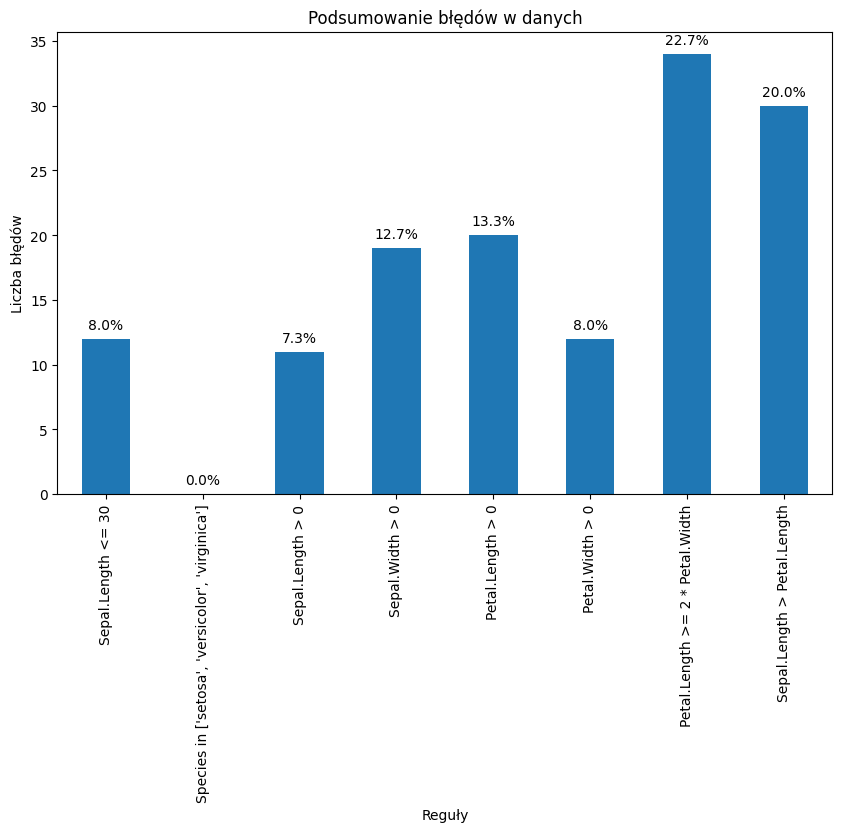

In [31]:
import matplotlib.pyplot as plt
# Wykres naruszeń:
violation_counts = pd.Series(summary)
ax = violation_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Podsumowanie błędów w danych')
plt.xlabel('Reguły')
plt.ylabel('Liczba błędów')

# Dodaję procenty nad słupki:
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(dirty_iris) * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

Sprawdź, które kwiaty mają zbyt długie działki kielicha, korzystając z wyników naruszeń.

In [32]:
violations = {rule: ~result for rule, result in rules.items()}
violated_df = pd.DataFrame(violations)
violated_rows = dirty_iris[violated_df["Sepal.Length <= 30"]]
print(violated_rows)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
14            NaN          3.9          1.70          0.4      setosa
18            NaN          4.0           NaN          0.2      setosa
24            NaN          3.0          5.90          2.1   virginica
27           73.0         29.0         63.00          NaN   virginica
29            NaN          2.8          0.82          1.3  versicolor
57            NaN          2.9          4.50          1.5  versicolor
67            NaN          3.2          5.70          2.3   virginica
113           NaN          3.3          5.70          2.1   virginica
118           NaN          3.0          5.50          2.1   virginica
119           NaN          2.8          4.70          1.2  versicolor
124          49.0         30.0         14.00          2.0      setosa
137           NaN          3.0          4.90          1.8   virginica


Znajdźmy wartości odstające w długości działki przy użyciu metody boxplot. 

Pobierzemy odpowiednie obserwacje i sprawdź pozostałe wartości. 

Jakieś pomysły, co mogło się stać? 

Ustawimy wartości odstające na NA (lub wartość, którą uznasz za bardziej odpowiednią).

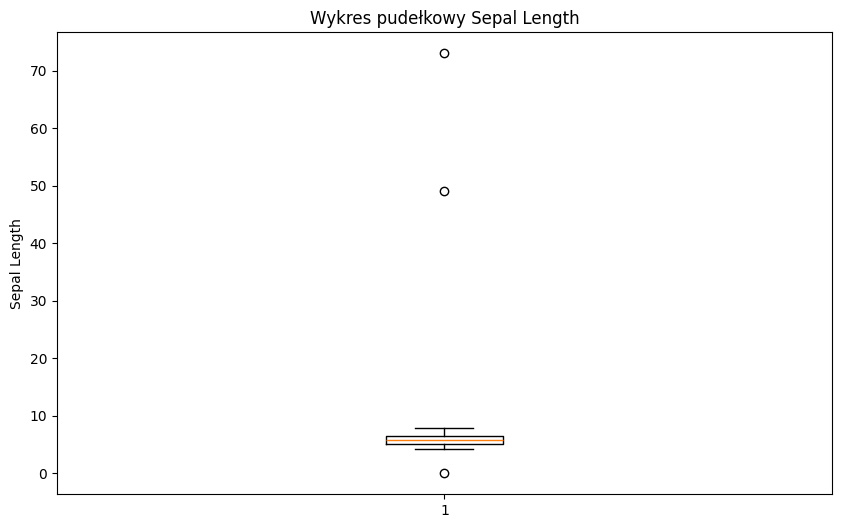

In [33]:
plt.figure(figsize=(10, 6))
plt.boxplot(dirty_iris['Sepal.Length'].dropna())
plt.title('Wykres pudełkowy Sepal Length')
plt.ylabel('Sepal Length')
plt.show()

In [35]:
# Znajdziemy obserwacje odstające:
outliers = dirty_iris['Sepal.Length'][np.abs(dirty_iris['Sepal.Length'] - dirty_iris['Sepal.Length'].mean()) > (1.5 * dirty_iris['Sepal.Length'].std())]
outliers_idx = dirty_iris.index[dirty_iris['Sepal.Length'].isin(outliers)]

# Wydrukujemy je:
print("Odstające:")
print(dirty_iris.loc[outliers_idx])

Odstające:
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
27           73.0         29.0          63.0          NaN  virginica
124          49.0         30.0          14.0          2.0     setosa


Wszystkie wydają się za duże... może były mierzone w mm zamiast w cm?

In [36]:
# Skorygujemy wartości odstające (zakładając, że zostały zmierzone w mm zamiast w cm).
dirty_iris.loc[outliers_idx, ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']] /= 10

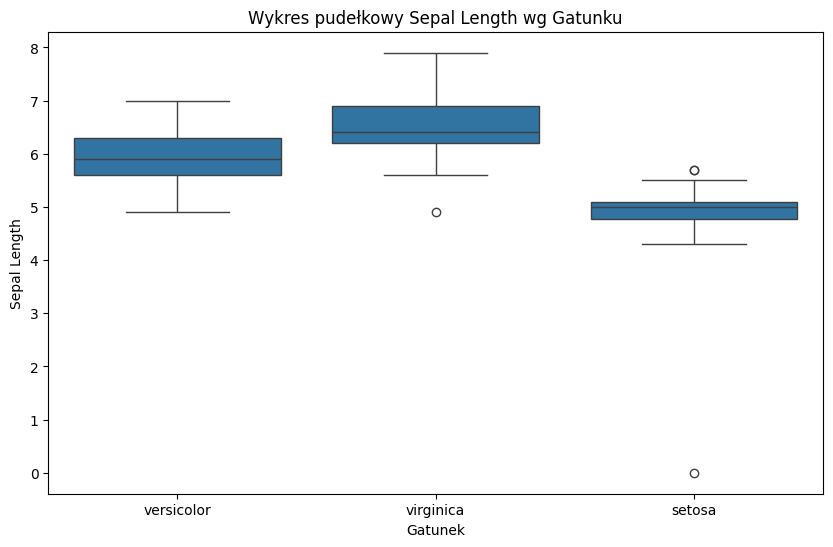

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='Sepal.Length', data=dirty_iris)
plt.title('Wykres pudełkowy Sepal Length wg Gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Sepal Length')
plt.show()

Zwróćmy uwagę, że prosty boxplot pokazuje dodatkową wartość odstającą!

## Korekta błędów

Zastąpmy wartości niedodatnie z Sepal.Width wartością NA:

In [38]:
# Definiujemy regułę korekty:
def correct_sepal_width(df):
    df.loc[(~df['Sepal.Width'].isna()) & (df['Sepal.Width'] <= 0), 'Sepal.Width'] = np.nan
    return df

# Stosujemy korektę dla ramki danych:
mydata_corrected = correct_sepal_width(dirty_iris)

# i obejrzyjmy dane:
print(mydata_corrected)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0             6.4          3.2           4.5          1.5  versicolor
1             6.3          3.3           6.0          2.5   virginica
2             6.2          NaN           5.4          2.3   virginica
3             5.0          3.4           1.6          0.4      setosa
4             5.7          2.6           3.5          1.0  versicolor
..            ...          ...           ...          ...         ...
145           6.7          3.1           5.6          2.4   virginica
146           5.6          3.0           4.5          1.5  versicolor
147           5.2          3.5           1.5          0.2      setosa
148           6.4          3.1           NaN          1.8   virginica
149           5.8          2.6           4.0          NaN  versicolor

[150 rows x 5 columns]


Zastąpienie wszystkich błędnych wartości wartością NA przy użyciu (wyniku) localizeErrors:

In [86]:
# stosujemy reguły dla naruszeń (błędów):
rules = check_rules(dirty_iris)
violations = {rule: ~result for rule, result in rules.items()}
violated_df = pd.DataFrame(violations)

# lokalizujemy błędy i zamieniamy je na NA:
for col in violated_df.columns:
    dirty_iris.loc[violated_df[col], col.split()[0]] = np.nan

## Twoja kolej!

Lepiej mieć NA, niz błędy w danych. Moznaby było ewentualnie pokusić się teraz o imputację nowopowstałych braków...

In [39]:
## Twój kod tutaj

### Duplikaty

Duplikaty w danych to wiersze, które są identyczne w każdej kolumnie lub w wybranym podzbiorze kolumn. Mogą one prowadzić do błędnych analiz, ponieważ nadmiernie wpływają na wyniki statystyczne i modele.

Zduplikowane obserwacje najczęściej pojawiają się podczas gromadzenia danych, na przykład gdy:
- Łączymy zbiory danych z wielu miejsc
- Scraping danych (zbieranie danych poprzez scraping stron internetowych)
- Otrzymujemy dane od klientów/innych działów jeśli używamy scraping, może się zdarzyć, że zeskrobujemy tę samą stronę internetową więcej niż raz lub te same informacje z dwóch różnych stron. 

Bez względu na przyczynę, duplikacja może prowadzić do błędnych wniosków, prowadząc nas do przekonania, że niektóre obserwacje są bardziej powszechne niż w rzeczywistości.

#### Jak zidentyfikować duplikaty?

W Pythonie możemy użyć metody `.duplicated()` z biblioteki `pandas`, aby sprawdzić, które wiersze są duplikatami.

```python
# Sprawdzenie, które wiersze są duplikatami
df.duplicated()
```
Metoda .duplicated() zwraca True dla wszystkich wierszy, które są duplikatami wcześniejszych wierszy.

**Jak policzyć liczbę duplikatów?**

Aby policzyć liczbę duplikatów w zbiorze danych, możemy użyć:

In [72]:
# tworzymy dane z duplikatami
df = pd.DataFrame({"Name":["John", "Rock", "Neil", "Tom","John","John"], "Rank":[1,2,3,6,1,1], "Marks":[98,59,97,99,98,98]})
df

,Name,Rank,Marks
0,John,1,98
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99
4,John,1,98
5,John,1,98


In [73]:
# Liczba duplikatów
df.duplicated().sum()

np.int64(2)

In [74]:
# pokaz duplikaty
df.loc[df.duplicated(keep=False)]

,Name,Rank,Marks
0,John,1,98
4,John,1,98
5,John,1,98


In [75]:
# Odrzuca duplikaty z wyjątkiem pierwszego wystąpienia.
df1 = df.drop_duplicates(keep='first')
df1

,Name,Rank,Marks
0,John,1,98
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99


In [76]:
# usuwa wszystkie zduplikowane wiersze
df2 = df.drop_duplicates(keep=False) 
df2

,Name,Rank,Marks
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99


In [77]:
# Usuwa duplikaty z wyjątkiem ostatniego wystąpienia.
df3 = df.drop_duplicates(keep="last")
df3

,Name,Rank,Marks
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99
5,John,1,98


In [78]:
# zmiana zestawu danych poprzez ustawienie inplace na true
df.drop_duplicates(keep='first', inplace=True)
df

,Name,Rank,Marks
0,John,1,98
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99


### Duplikaty - przykład

In [79]:
df_adult = pd.read_csv("data/wrangling/adult.csv")
df_adult.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


### Twoja kolej!

Otrzymujesz zbiór danych "adult" i musisz sprawdzić, czy są w nim duplikaty. Jeśli są - rozwiąz problem z nimi związany.

In [80]:
# Twój kod tutaj

## Łączenie zbiorów danych

> **Łączenie** odnosi się do *łączenia* różnych zbiorów danych w celu wykorzystania mocy dodatkowych informacji.
> 
- Może łączyć zbiory danych jako funkcję:
   - Wspólnego *okna czasowego*. 
   - Wspólnej *tożsamości*.

### Dlaczego scalać?

- Każdy zbiór danych zawiera *ograniczone* informacje.
   - Na przykład „PKB” według „roku”. 
- Ale **łączenie** zbiorów danych pozwala nam zobaczyć, jak więcej zmiennych jest ze sobą powiązanych i wzajemnie na siebie oddziałuje.
- Wiele badań obejmuje **lokalizowanie** zbiorów danych i zastanawianie się, jak je **połączyć**.

### Jak scalać?

W Pythonie, `pandas.merge` pozwala nam połączyć dwie `DataFrame` na wspólnej kolumnie (kolumnach).

```python
pd.merge(df1, df2, on = "shared_column")
```

### `merge` w praktyce

Dla demonstracji, połączymy dwa zbiory danych lingwistycznych:

- Jeden zbiór danych zawiera informacje o **Age of Acquisition** różnych angielskich słów (Kuperman et al., 2014).
- Drugi zbiór danych zawiera informacje o **częstotliwości** i **konkretności** angielskich słów (Brysbaert et al., 2014).

#### Ładujemy dane

In [40]:
df_aoa = pd.read_csv("data/wrangling/AoA.csv")
df_aoa.head(1)

,Word,AoA
0,a,2.89


In [41]:
df_conc = pd.read_csv("data/wrangling/concreteness.csv")
df_conc.head(1)

,Word,Concreteness,Frequency,Dom_Pos
0,sled,5.0,149,Adjective


#### Różne *rodzaje* łączenia

Jak widzimy, zbiory danych nie są tej samej **wielkości**. To pozostawia nam decyzję do podjęcia podczas łączenia.

- `inner` join: Czy zachowujemy tylko słowa w *obu* zbiorach danych?
- `left` join: Czy zachowujemy wszystkie słowa w jednym zbiorze danych („lewym”), niezależnie od tego, czy występują w drugim?
- `right` join: Czy zachowujemy wszystkie słowa w jednym zbiorze danych („prawym”), niezależnie od tego, czy występują w drugim?
- `outer` join: Czy zachowujemy wszystkie słowa w obu zbiorach, pozostawiając puste (`nan`) wartości tam, gdzie słowo występuje tylko w jednym zbiorze danych?

In [57]:
df_aoa.shape

(31124, 2)

In [58]:
df_conc.shape

(28612, 4)

#### `inner` join

- Dla naszych celów najbardziej sensowne jest użycie `inner` join.
- Pozostawia nam to mniej słów niż występuje w *obu* zbiorach danych.

In [42]:
df_merged = pd.merge(df_aoa, df_conc, on = "Word", how = "inner")
df_merged.head(2)

,Word,AoA,Concreteness,Frequency,Dom_Pos
0,aardvark,9.89,4.68,21,Noun
1,abacus,8.69,4.52,12,Noun


In [43]:
df_merged.shape

(23569, 5)

#### Twoja kolej!

Co się stanie, jeśli użyjesz innego rodzaju złączenia, np. `outer` lub `left`? Co można zauważyć w „kształcie” wynikowej ramki danych? Czy niektóre wiersze mają wartości `nan`?

In [ ]:
### Twój kod tutaj

### Dlaczego `merge` jest tak przydatne

Teraz, gdy połączyliśmy nasze zbiory danych, możemy przyjrzeć się, jak zmienne *poprzecznie* odnoszą się do siebie nawzajem.

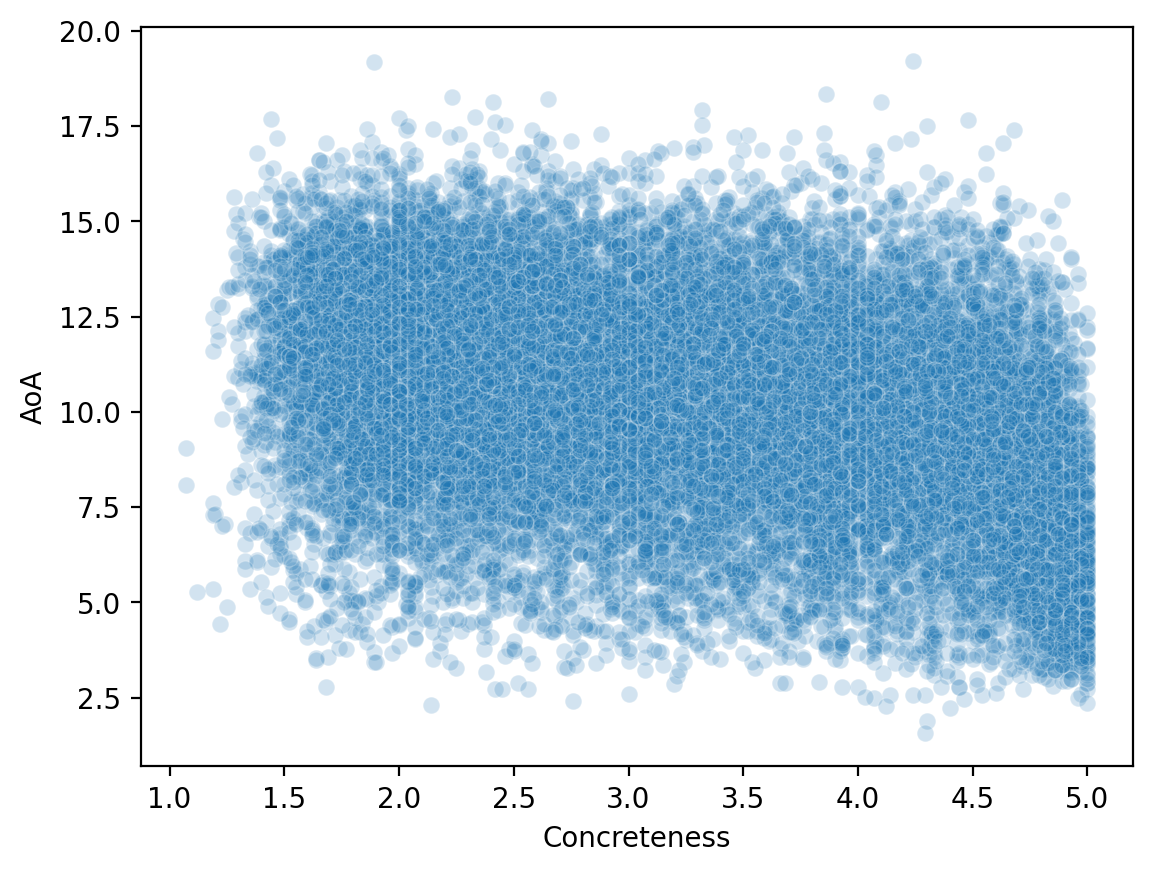

In [64]:
sns.scatterplot(data = df_merged, x = 'Concreteness',
                y = 'AoA', alpha = .2 );

## Przekształcanie danych

> **Przekształcanie danych** polega na przekształcaniu ich z jednego formatu (np. "szerokiego") do innego (np. "długiego"), aby uczynić je bardziej podatnymi na wizualizację i analizę.

Często musimy **uporządkować** nasze dane.

### Czym są uporządkowane dane?

**Porządkowanie danych** to szczególny sposób formatowania danych, w którym:

1. Każda zmienna tworzy kolumnę (np. `GDP`).
2. Każda obserwacja tworzy wiersz (np. `kraj`).
3. Każdy typ jednostki obserwacji tworzy tabelę (**dane tabelaryczne**!).

Pierwotnie opracowany przez Hadleya Wickhama, twórcę `tidyverse` w R.

### Uporządkowane vs. "nieuporządkowane" dane

Zobaczmy teraz kilka przykładów **uporządkowanych** vs. **nieuporządkowanych** danych.

Należy o tym pamiętać:

- Wszystkie te zbiory danych zawierają **te same informacje**, tylko w różnych **formatach**.
- „Nieuporządkowane” dane mogą być przydatne do innych celów, np. do prezentacji w artykule.
- Kluczowym celem uporządkowanych danych jest to, że **każdy wiersz reprezentuje obserwację**.

#### Uporządkowane dane

**Pytanie:**: Dlaczego te dane są uważane za uporządkowane?

In [44]:
df_tidy = pd.read_csv("data/wrangling/tidy.csv")
df_tidy

,ppt,condition,rt
0,john,Congruent,200
1,john,Incongruent,250
2,mary,Congruent,178
3,mary,Incongruent,195


#### Nieuporządkowane dane 1

**Pytanie:**: Dlaczego te dane *nie* są uważane za uporządkowane?

In [45]:
df_messy1 = pd.read_csv("data/wrangling/messy1.csv")
df_messy1

,john,mary,condition
0,200,178,Congruent
1,250,195,Incongruent


#### Nieuporządkowane dane 2

**Pytanie:**: Dlaczego te dane *nie* są uważane za uporządkowane?

In [67]:
df_messy2 = pd.read_csv("data/wrangling/messy2.csv")
df_messy2

,congruent,incongruent,ppt
0,200,250,john
1,178,195,mary


### Uporządkowanie danych

Na szczęście, `pandas` umożliwia przekształcenie "nieuporządkowanego" `DataFrame` w **uporządkowany**.

Kluczowa funkcja to: `pandas.melt`.

```python
pd.melt(df, ### dane
        id_vars = [...], ### jakie jest ID kolumny?
        var_name = ..., ### nazwa dla zmiennej grupującej po kolumnach
        value_name = ..., ### nazwa wartości, jaką przyjmuje ta zmienna
```

Jeśli wydaje się to **abstrakcyjne**, nie martw się - stanie się jaśniejsze dzięki przykładom!


#### Zastosujmy `pd.melt`

- Zacznijmy od naszej pierwszej niechlujnej `DataFrame`.
- Posiada kolumny dla każdego `ppt`, które zawierają informacje o `rt`.

In [68]:
df_messy1

,john,mary,condition
0,200,178,Congruent
1,250,195,Incongruent


In [69]:
pd.melt(df_messy1, id_vars = 'condition', ### condition jest ID zmiennej
       var_name = 'ppt', ### now wiersz dla kazdej obserwacji ppt
       value_name = 'rt') ### etykieta dla zmiennej 

,condition,ppt,rt
0,Congruent,john,200
1,Incongruent,john,250
2,Congruent,mary,178
3,Incongruent,mary,195


#### Twoja kolej!

Spróbuj użyć `pd.melt`, aby przekształcić `df_messy2` w **schludną** `DataFrame`.

**Wskazówka**: Pomyśl o istniejącej strukturze `DataFrame` - jak dane są pogrupowane - i jakie byłyby `id_vars`.

In [70]:
df_messy2

,congruent,incongruent,ppt
0,200,250,john
1,178,195,mary


In [71]:
### Twój kod tutaj

### Prawdziwy zestaw danych

Teraz przejdziemy do prawdziwego zestawu danych, który Timothy Lee, twórca [Full Stack Economics](https://www.fullstackeconomics.com/), skompilował i udostępnił.

In [46]:
df_work = pd.read_csv("data/viz/missing_work.csv")
df_work.head(5)

,Year,Child care problems,Maternity or paternity leave,Other family or personal obligations,Illness or injury,Vacation,Month
0,2012,18,313,246,899,1701,10
1,2012,35,278,230,880,1299,11
2,2012,13,245,246,944,1005,12
3,2013,14,257,250,1202,1552,1
4,2013,27,258,276,1079,1305,2


#### Twoja kolej!

Czy ten zbiór danych jest uporządkowany? Jak moglibyśmy go uporządkować, jeśli nie - tj. gdybyśmy chcieli, aby każdy *wiersz* był pojedynczą obserwacją odpowiadającą jednemu z *powodów* braku pracy?

In [ ]:
### Twój kod tutaj

#### Solution

In [20]:
df_melted = pd.melt(df_work, id_vars = ['Year', 'Month'],
                    var_name = "Reason",
                    value_name = "Days Missed")
df_melted.head(2)

,Year,Month,Reason,Days Missed
0,2012,10,Child care problems,18
1,2012,11,Child care problems,35


### Dlaczego uporządkowane dane są przydatne

Na koniec użyjmy tego zestawu danych do odtworzenia wykresu z [FullStackEconomics](https://www.fullstackeconomics.com/).

#### Oryginalny wykres

![title](img/work.png)

#### Twoja kolej!

Jakich narzędzi z `seaborn` można użyć do odtworzenia tego wykresu?

In [47]:
### Twój kod tutaj

In [24]:
# %load ./solutions/solution7.py

## Transformacje danych

Czasami spotykamy się z sytuacją, w której mamy problemy ze skośnymi rozkładami lub po prostu chcemy przekształcić, przekodować lub wykonać dyskretyzację. Przyjrzyjmy się kilku najpopularniejszym metodom transformacji.

Standaryzacja:

- Podejście **$Z$-score** - procedura standaryzacji, wykorzystująca wzór: $z=\frac{x-\mu}{\sigma}$, gdzie $\mu$ = średnia, a $\sigma$ = odchylenie standardowe. Wyniki $Z$ są również znane jako wyniki standaryzowane; są to wyniki (lub wartości danych), którym przypisano wspólny *standard*. Ten standard to średnia równa zero i odchylenie standardowe równe 1.

- Podejście **minmax** - Alternatywnym podejściem do normalizacji (lub standaryzacji) wyniku $Z$ jest tak zwane skalowanie MinMax (często nazywane również po prostu „normalizacją” - co jest częstą przyczyną niejednoznaczności). W tym podejściu dane są skalowane do ustalonego zakresu - zwykle od 0 do 1. Kosztem posiadania tego ograniczonego zakresu - w przeciwieństwie do normalizacji - jest to, że otrzymamy mniejsze odchylenia standardowe, które mogą tłumić efekt wartości odstających. Jeśli chcesz wykonać skalowanie MinMax - po prostu odejmij wartość minimalną i podziel ją przez zakres: $(x-min)/(max-min)$.

Normalizacja:

Aby rozwiązać problemy z bardzo skośnymi rozkładami, możemy również użyć kilku rodzajów prostych przekształceń:

- $log$
- $log+1$
- $sqrt$
- $x^2$
- $x^3$

***Ćwiczenie:*** Znormalizuj dochody i przedstaw przekształcony rozkład dochodów na wykresie pudełkowym.

In [48]:
dochody = pd.read_csv("data/models/income.csv")
dochody.head(3)

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727


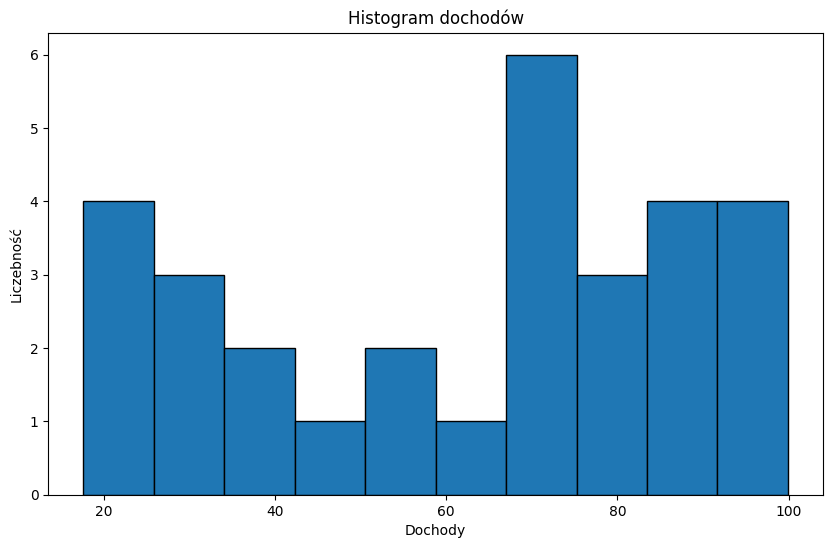

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(dochody['Income'], edgecolor='black')
plt.title('Histogram dochodów')
plt.xlabel('Dochody')
plt.ylabel('Liczebność')
plt.show()

In [ ]:
# Twój kod tutaj

### Transformacje Boxa - Coxa

Transformacja Box-Coxa jest techniką stosowaną podczas przygotowania danych (data wrangling), która pomaga ustabilizować wariancję i przekształcić dane tak, aby były bliższe rozkładowi normalnemu – co jest pożądane w wielu metodach analizy statystycznej i modelowania. Transformacja ta sprawdza się szczególnie dobrze przy danych z prawostronnym skośnym rozkładem. Wymaga dodatnich wartości i polega na znalezieniu optymalnego parametru λ (lambda), który jest dobierany metodą największej wiarygodności. 

> W Pythonie transformację Box-Coxa można wykonać za pomocą funkcji *boxcox* z modułu **scipy.stats**. 

Niech $y=(y_1,y_2,…,y_n)$ to dane, do których ma zostać zastosowana transformacja Boxa-Coxa. Box i Cox zdefiniowali swoją transformację jako:

dla $\lambda \neq 0$:

$$
y{(i)}^{\lambda}=\frac{1}{\lambda}*(y_{i}^{\lambda}-1)    
$$

dla $\lambda = 0$

$$
log(y_i)  
$$

takich jak nieznana $\lambda$,

$$
y^\lambda=X* \beta + \epsilon
$$

gdzie $y^{(\lambda)}$ jest $\lambda$-transformowanymi danymi, X to macierz projektowa (możliwe kowarianty będące przedmiotem zainteresowania), $\beta$ to zestaw parametrów związanych z danymi przekształconymi w $\lambda$, a $ϵ = (ϵ_1, ϵ_2, ..., ϵ_n)$ to termin błędu. Ponieważ celem równania (1) jest to, że

$$
y^{(\lambda)} \epsilon ~ N(X* \beta, \sigma^2*I_n),    (3)
$$
wtedy $\epsilon ~ N(0, \sigma^2)$. Należy zauważyć, że przekształcenie w równaniu (1) jest ważne tylko dla $y_i$ > 0, i = 1, 2, ..., n, a modyfikacje muszą być dokonane, gdy obecne są negatywne obserwacje.

In [52]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox

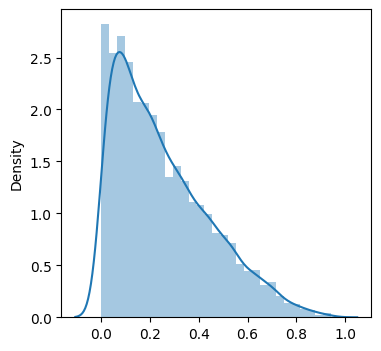

In [53]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (4, 4))
data = np.random.beta(1, 3, 5000) # we create random non normal data (from beta distribution)
sns.distplot(data)
plt.show()

In [56]:
data_transformed, lambda_ = boxcox(data) #Jeśli parametr lambda ma wartość None, drugim zwracanym argumentem jest 
# lambda, która maksymalizuje funkcję log-likelihood.
print('Przekształcone dane do rozkładu normalnego', data_transformed)
print(40*'==')
print('Lambda, która maksymalizuje funkcję logarytmu prawdopodobieństwa dla rozkładu normalnego:', lambda_)

Przekształcone dane do rozkładu normalnego [-0.77539127 -1.58479545 -0.8700257  ... -2.3587077  -1.6268521
 -1.18762806]
Lambda, która maksymalizuje funkcję logarytmu prawdopodobieństwa dla rozkładu normalnego: 0.3994437244556253


In [60]:
manually_transformed = [(i**lambda_ -1)/lambda_ for i in data] # ręcznie

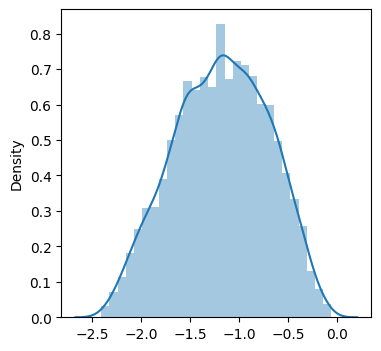

In [57]:
warnings.filterwarnings('ignore')
plt.figure(figsize = (4, 4))
sns.distplot(data_transformed)
plt.show()

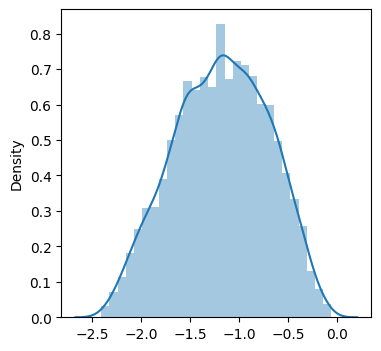

In [61]:
warnings.filterwarnings('ignore')
plt.figure(figsize = (4, 4))
sns.distplot(manually_transformed) # ręcznie dobrana lambda
plt.show()

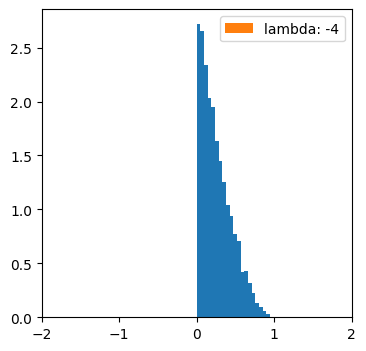

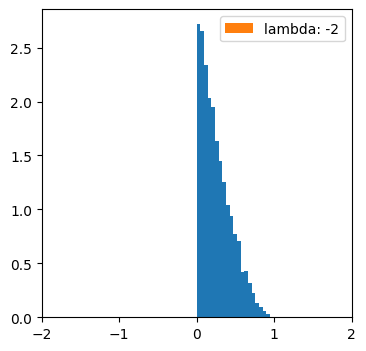

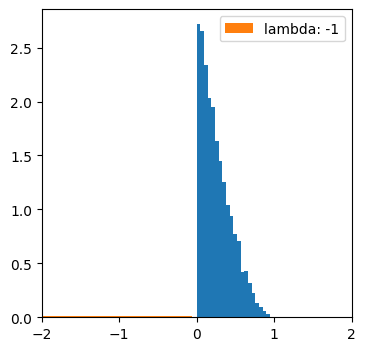

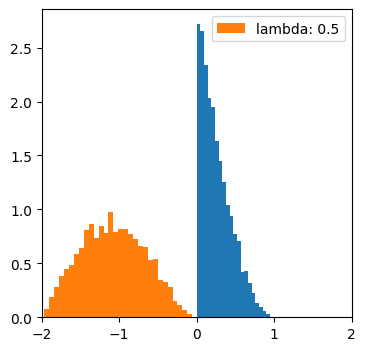

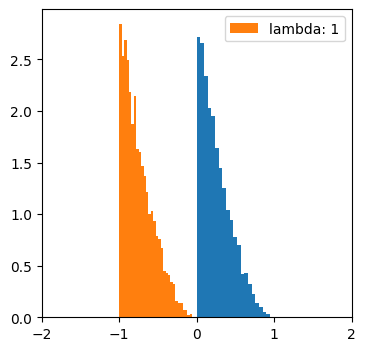

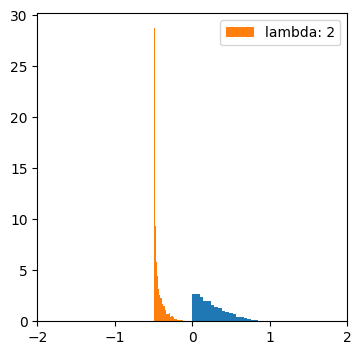

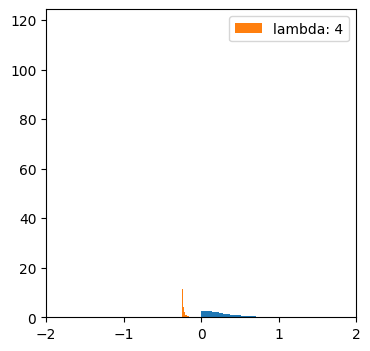

In [62]:
lambde = [-4,-2,-1,0.5,1,2,4] # tylko dla lambdy 0.5 mamy rozkład normalny
x = np.linspace(data.min(), data.max(), 5000)
for l in lambde:
    transformed = [(i**l -1)/l for i in data]
    plt.figure(figsize=(4,4))
    plt.hist(data, bins=20, density=True)
    plt.hist(transformed, bins=30, density=True, label = f'lambda: {l}')
    plt.xlim(-2, 2)
    plt.legend()

## Kategoryzacja danych

Czasami po prostu chcielibyśmy wykonać tak zwaną procedurę „binningu”, aby móc analizować nasze dane kategorialne, porównywać kilka zmiennych kategorialnych, konstruować modele statystyczne itp. Dzięki funkcji „binning” możemy przekształcić zmienne ilościowe w kategoryczne za pomocą kilku metod:

1. **Binning kwantylowy**
- Dzieli dane na grupy o równej wielkości na podstawie percentyli.
- Przykład: pd.qcut(data, q=4) tworzy 4 kategorie kwantylowe.

2. **Binning o równej szerokości kategorii** 
- Binning w celu uzyskania stałej długości kategorii (np. co 100 USD)

$$ \text{Bin width} = \frac{\text{max(data)} - \text{min(data)}}{\text{number of bins}} $$
- Przykład: pd.cut(data, bins=5) tworzy 5 kategorii o równej szerokości.

3. **Pretty Binning** 
- Kompromis między binningiem kwantylowym a binningiem o równej szerokości, tworzący estetyczne interwały.
- Zaokrąglone wartości na podstawie zakresu danych i liczby binów.

4. **K-Means Binning** 
- Metoda K-średnich (K-Means) to popularny algorytm grupowania (klastrowania), który dzieli dane na K grup (klastrów) na podstawie ich podobieństwa. W kontekście binningu, metoda ta pozwala na podział danych na przedziały (biny) w sposób oparty na ich naturalnym rozkładzie, a nie na sztywnych regułach, takich jak równa szerokość czy kwantyle.
- Celem algorytmu K-średnich jest minimalizacja sumy kwadratów odległości punktów od ich centroidów:
$$ \text{Minimalizacja } \sum_{i=1}^{n} (x_i - \mu_k)^2 $$ 
- gdzie $( \mu_k )$ jest średnią klastra $( k )$.
- W przypadku binningu metoda K-średnich działa następująco: dane są traktowane jako punkty w przestrzeni jednowymiarowej (np. wartości zmiennej ilościowej). Algorytm K-średnich grupuje dane w ( K ) klastrów Każdy klaster reprezentuje jeden przedział (bin), a granice przedziałów są wyznaczane na podstawie wartości centroidów.
  
**Zalety metody K-średnich w binningu:**
- Dynamiczne granice: Przedziały są dostosowane do rozkładu danych, co pozwala na lepsze odwzorowanie ich struktury.
- Elastyczność: Można dostosować liczbę klastrów (( K )) do potrzeb analizy.
- Redukcja wpływu wartości odstających: Wartości odstające są przypisywane do klastrów, ale nie wpływają znacząco na granice innych klastrów.
  
**Wady:**
- Wymaga określenia liczby klastrów (( K )): Wybór ( K ) może być trudny i wymaga eksperymentowania.
- Wrażliwość na inicjalizację: Wynik może zależeć od początkowego wyboru centroidów.
- Nieodporność na wartości odstające: Wartości odstające mogą wpłynąć na centroidy, jeśli są liczne.

5. **Bag Clustering (ang. bagging, czyli bootstrap aggregating)**.
- Grupuje dane przy użyciu technik workowych w celu poprawy stabilności klastrowania.
- Klastry są tworzone poprzez agregację wyników z wielu modeli klastrowania.

Każda metoda jest odpowiednia dla różnych przypadków użycia, w zależności od dystrybucji danych i celów analizy.

**Ćwiczenie** Korzystając z podejścia kwantylowego, wykonaj binning zmiennej „Dochód”. Wskazówka: w Pandas mamy gotową do wykorzystania funkcję [pd.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)

In [64]:
dochody.head(3)
# Twój kod tutaj

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727


## Podsumowanie

To było wprowadzenie do **data wranglingu**.

- Jak wspomniano, porządkowanie danych jest niezwykle ważnym tematem - i mogłoby stanowić cały przedmiot na tych studiach podyplomowych.
- Ale dzisiaj skupiliśmy się na:
 - Identyfikacji i usuwaniu brakujących danych.  
   - Łączeniu zestawów danych.  
   - Porządkowaniu danych.
   - Czyszczeniu danych.